In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings ('ignore')

## Preliminary Analysis

In [2]:
mkt_data=pd.read_csv('Market+Risk+Dataset.csv')

In [3]:
mkt_data.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
mkt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [26]:
mkt_data['Dates']=[pd.to_datetime(d) for d in mkt_data['Date']]

In [27]:
mkt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian Hotel         314 non-null    int64         
 3   Mahindra & Mahindra  314 non-null    int64         
 4   Axis Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree Cement         314 non-null    int64         
 7   Sun Pharma           314 non-null    int64         
 8   Jindal Steel         314 non-null    int64         
 9   Idea Vodafone        314 non-null    int64         
 10  Jet Airways          314 non-null    int64         
 11  Dates                314 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(10)
memory usage: 29.6 KB


In [31]:
mkt_data.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


In [37]:
mkt_data.shape

(314, 12)

## Price plots

In [28]:
num=(mkt_data.select_dtypes(include='int64')).columns

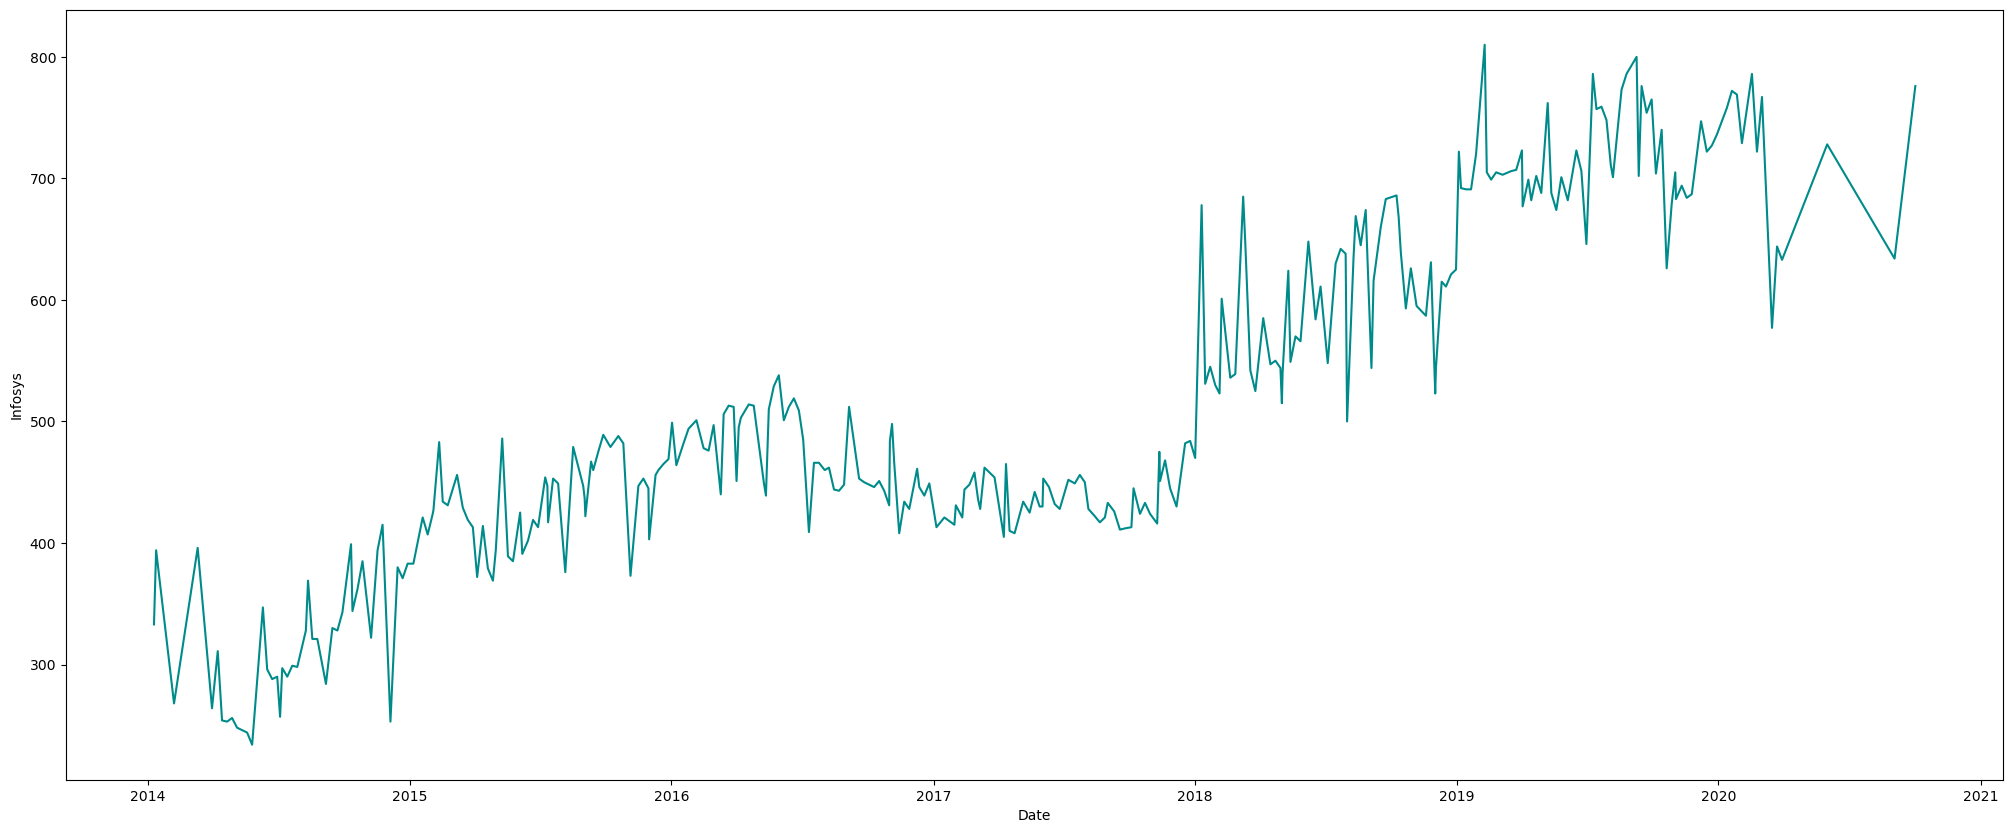

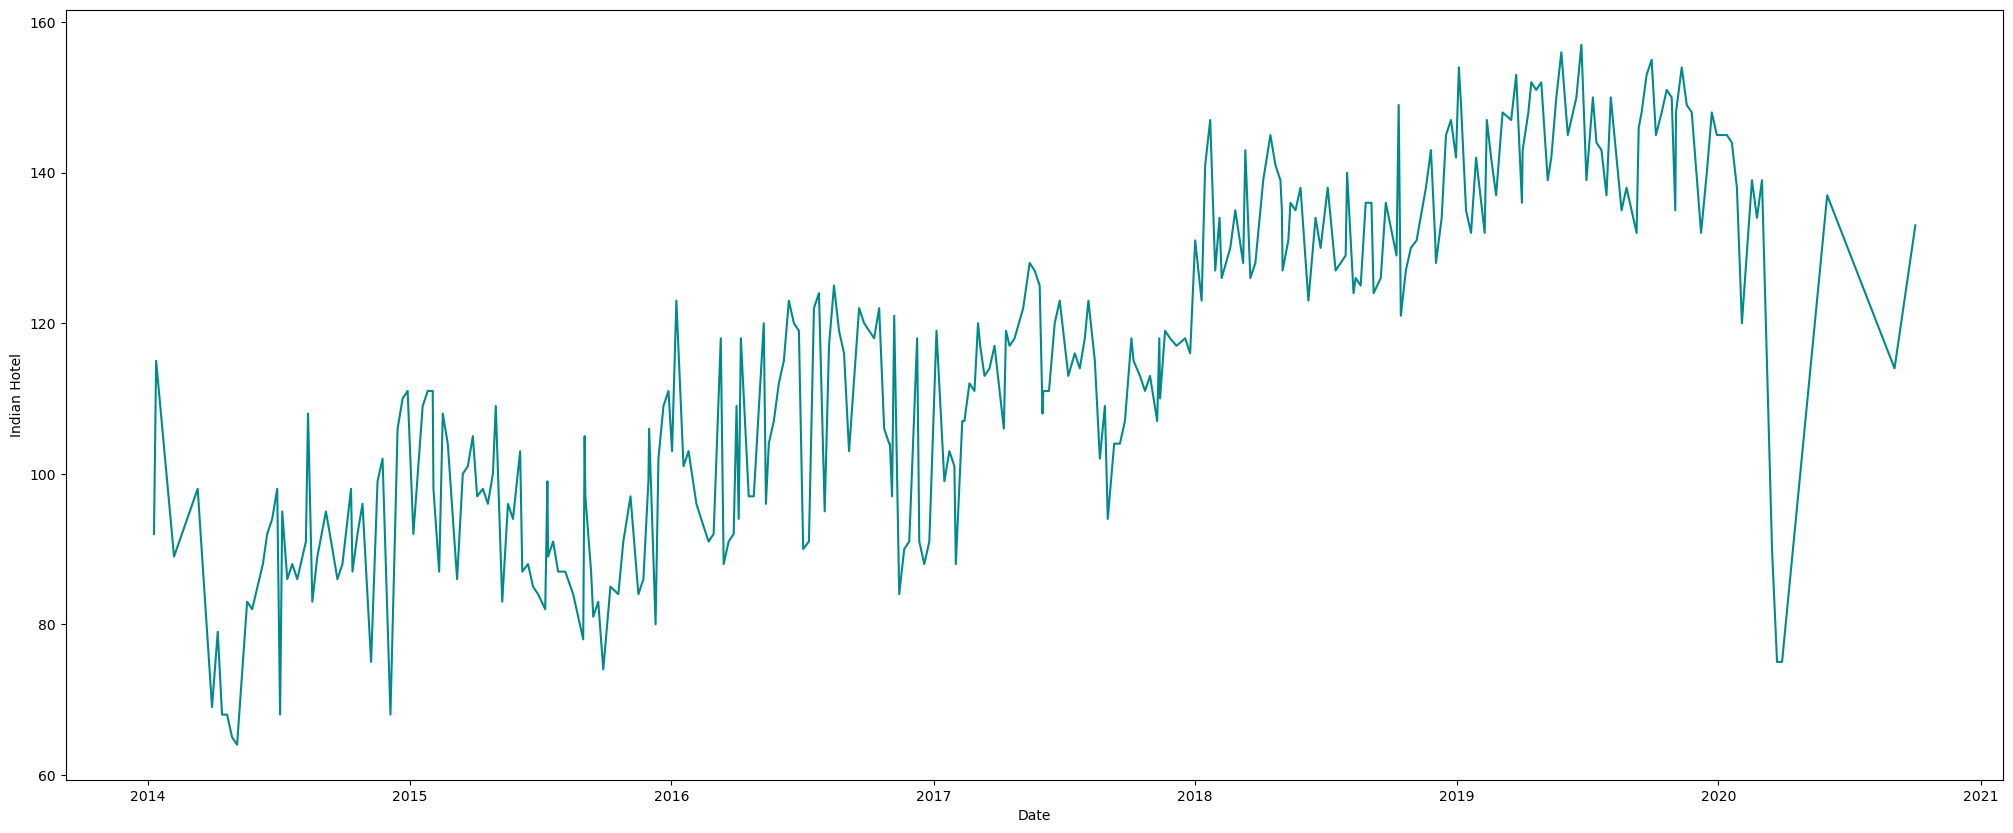

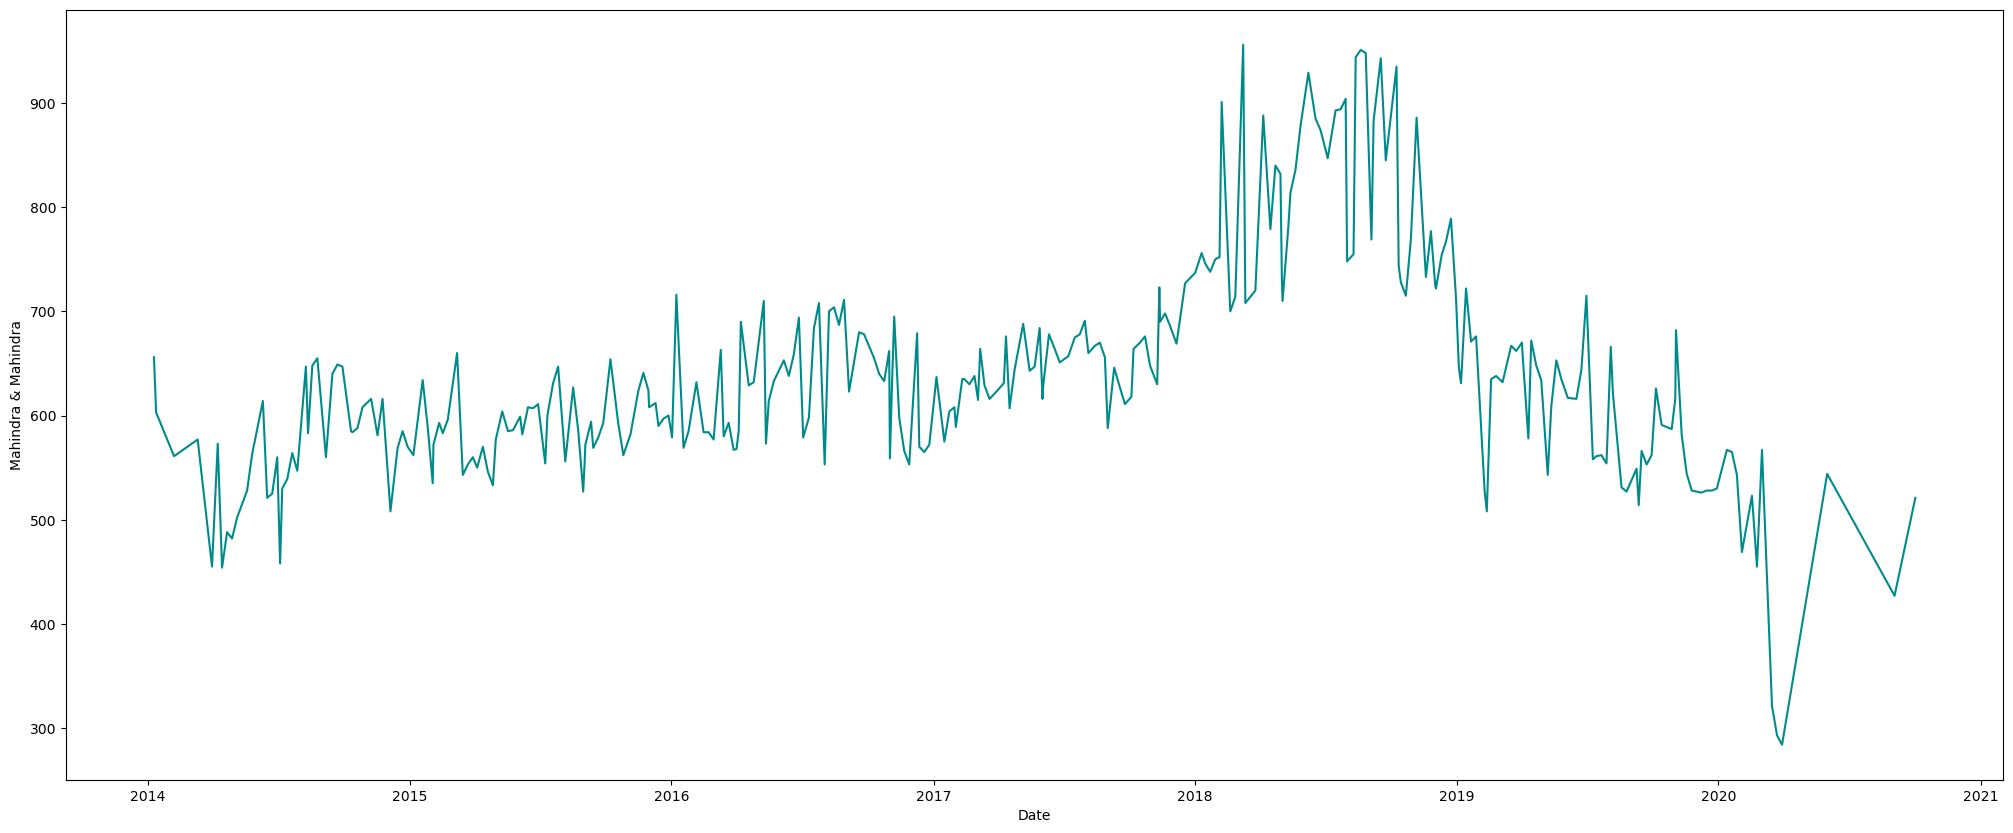

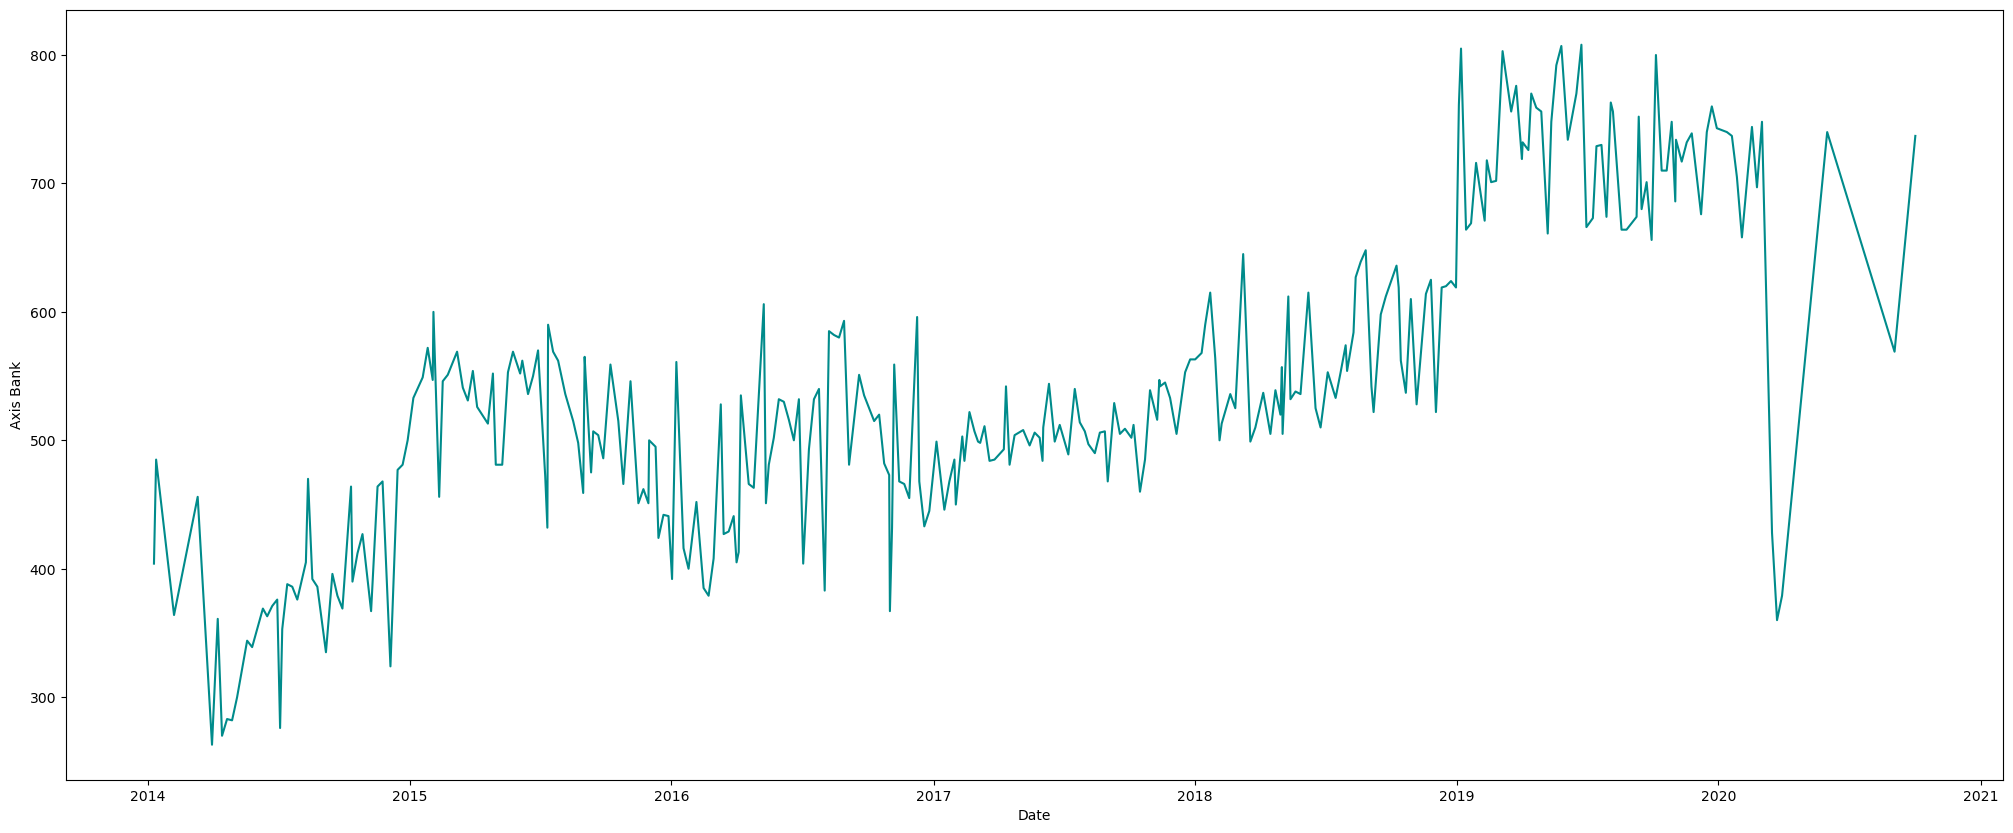

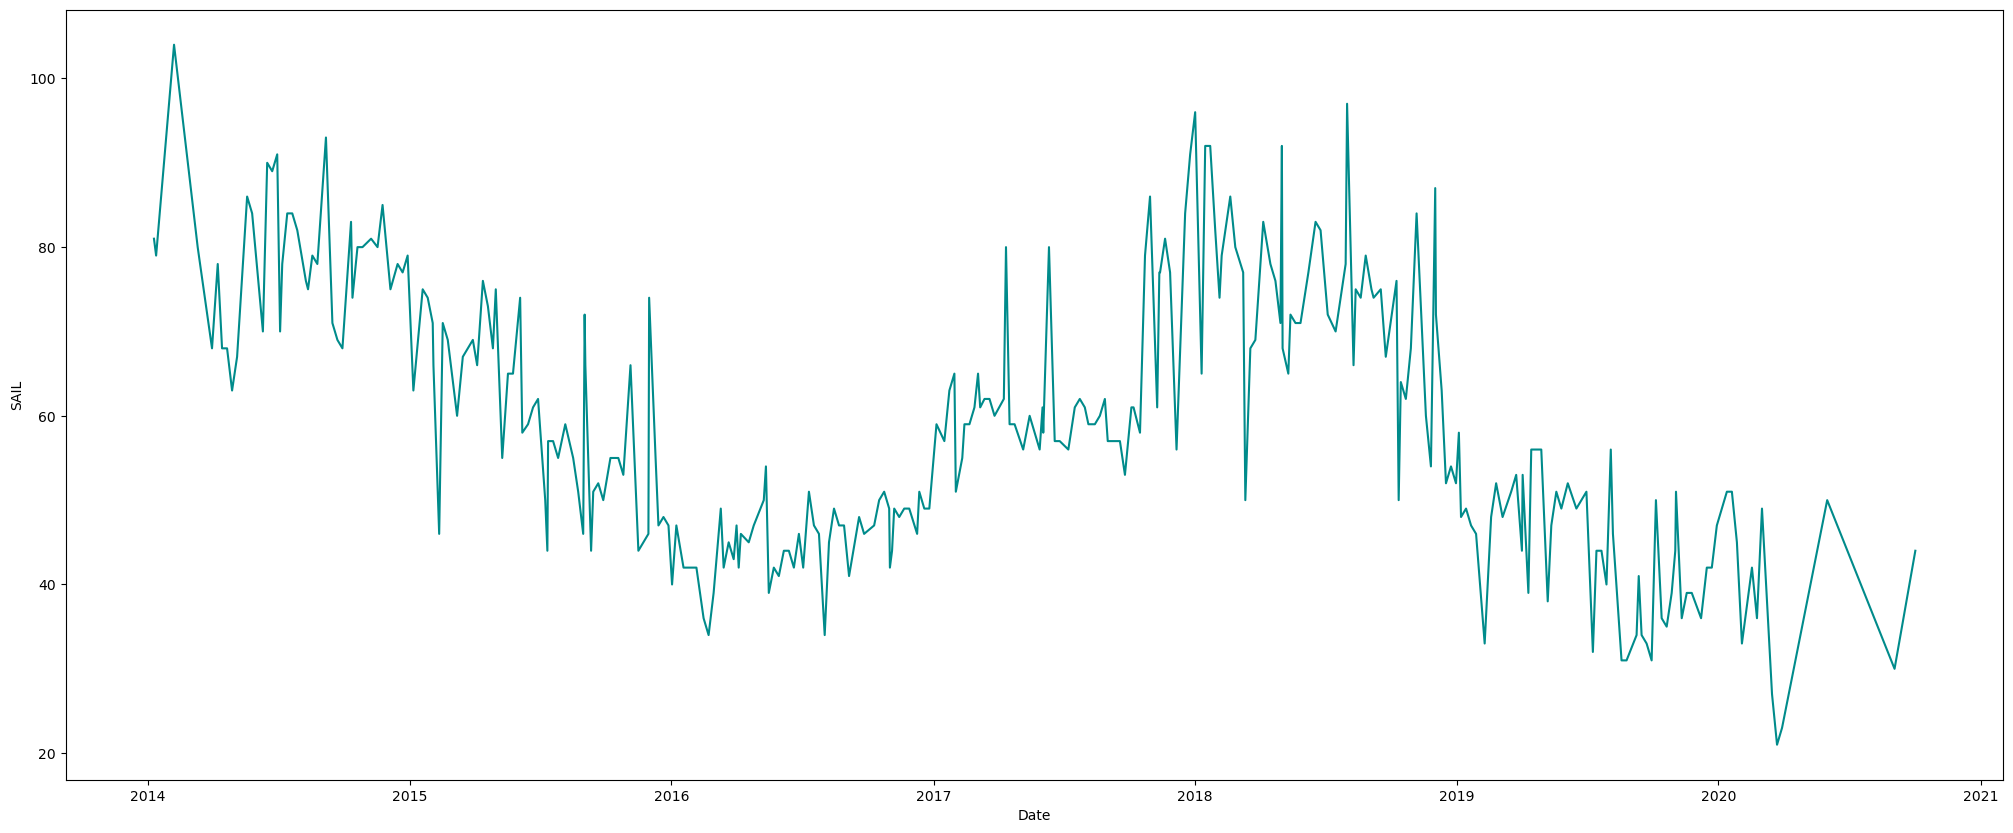

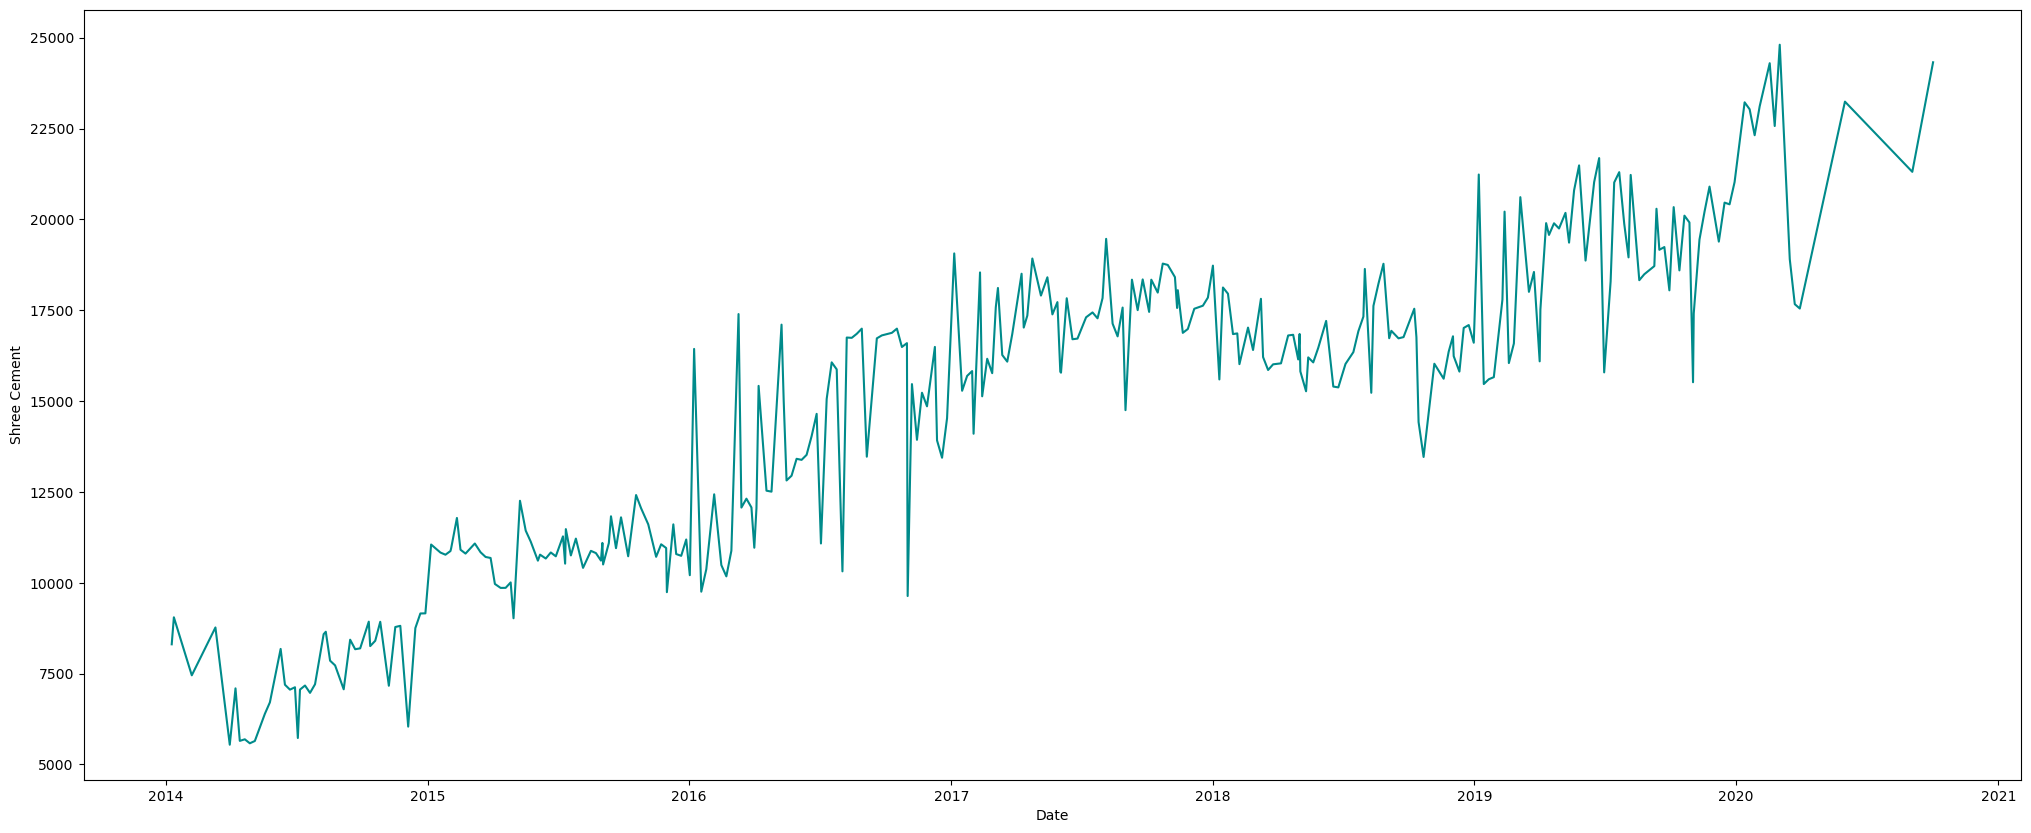

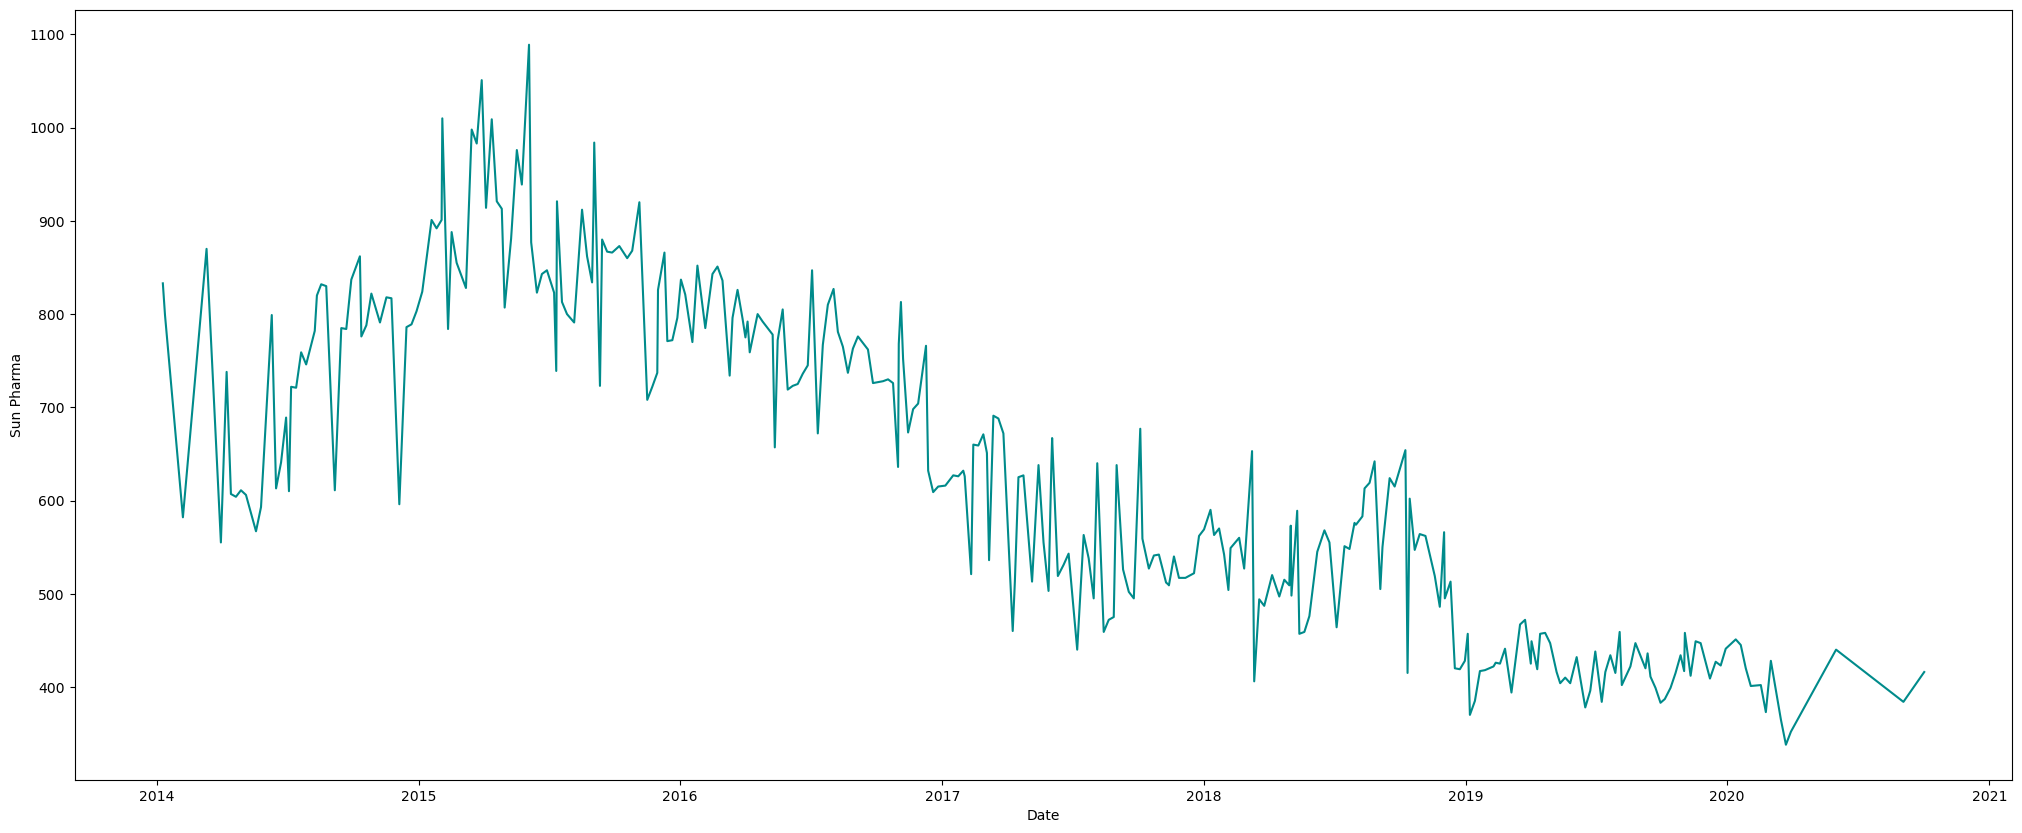

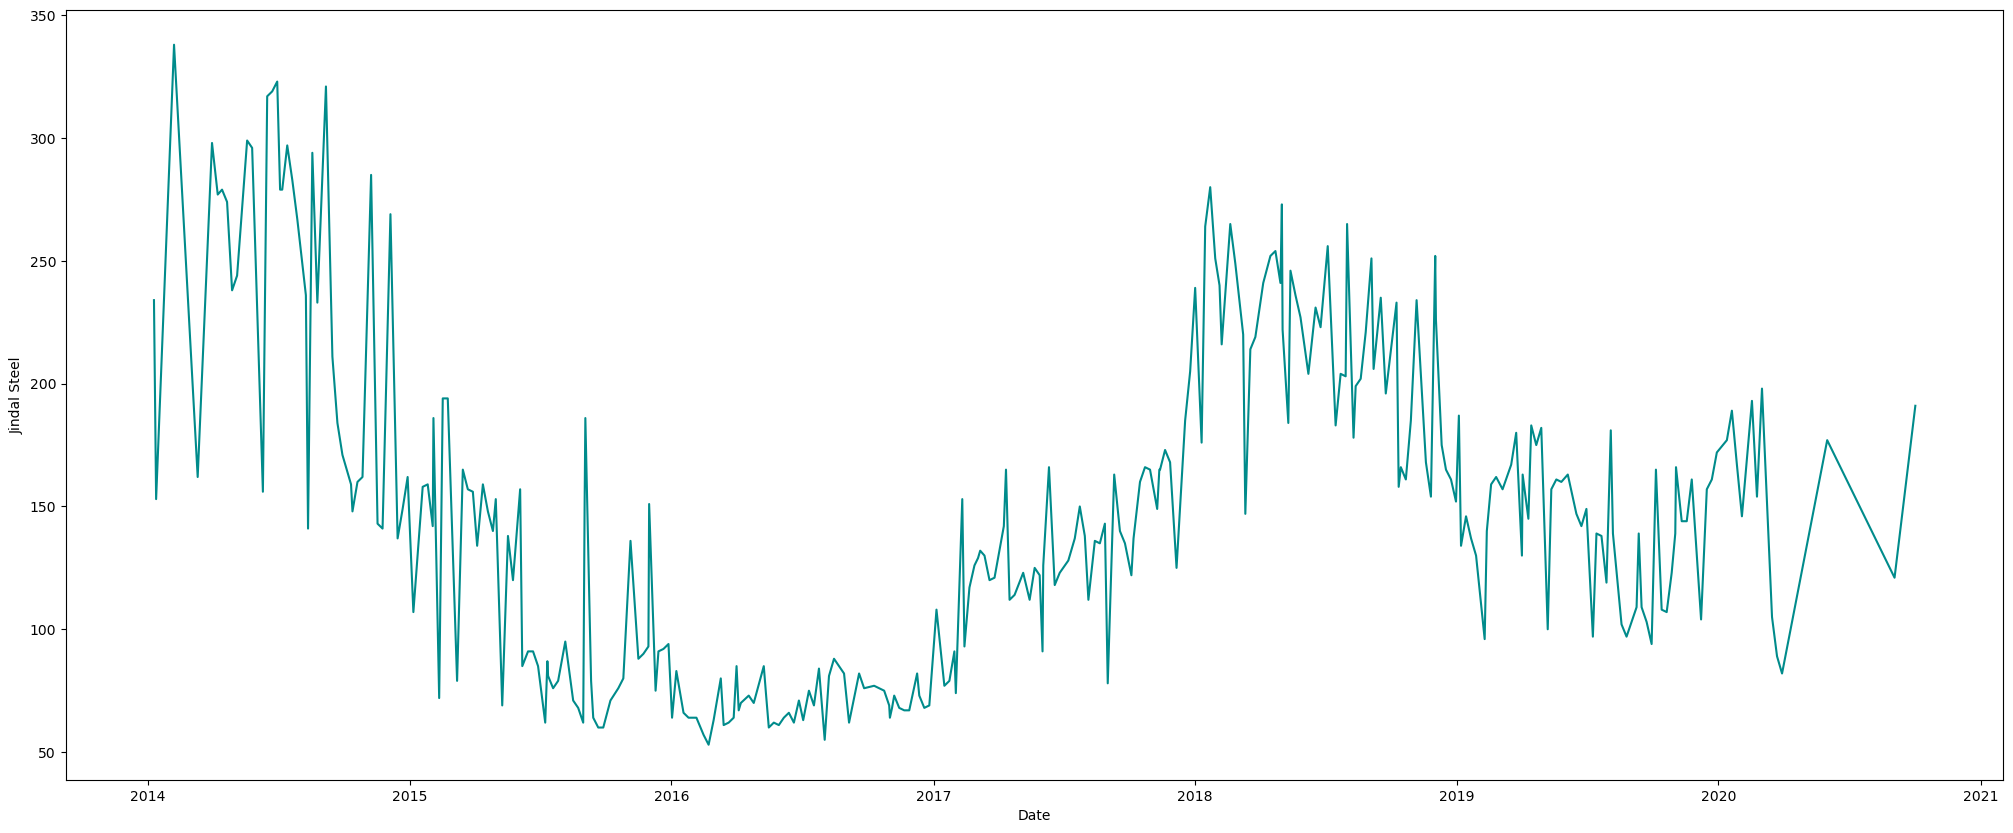

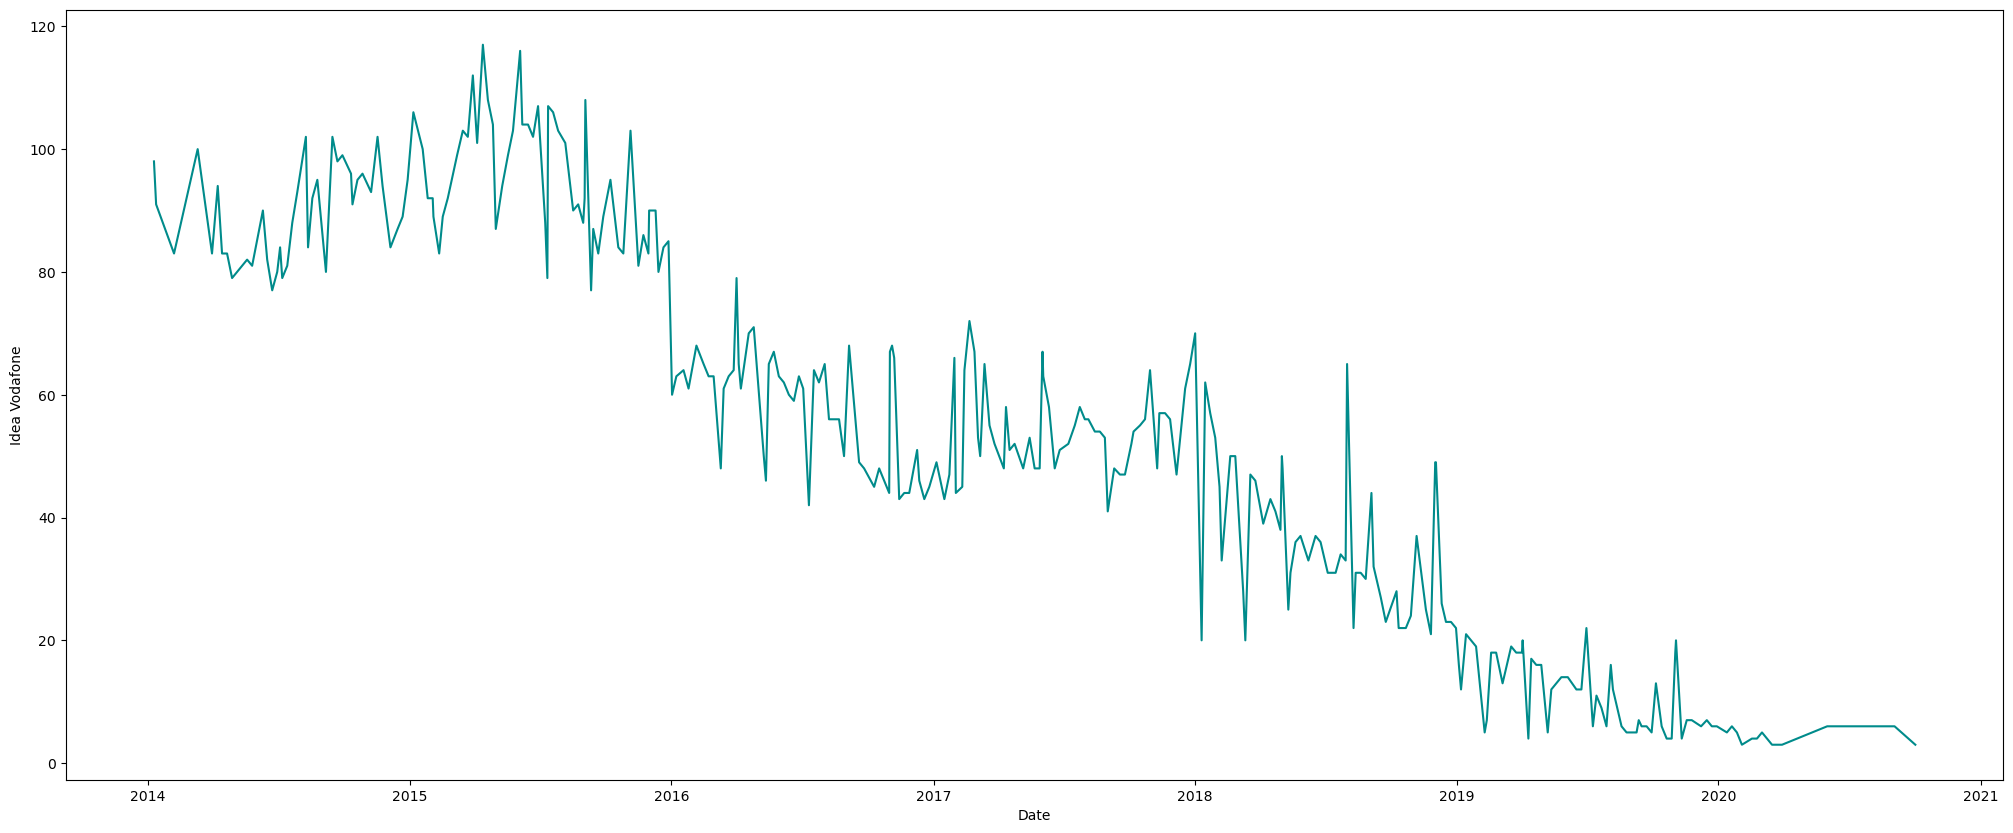

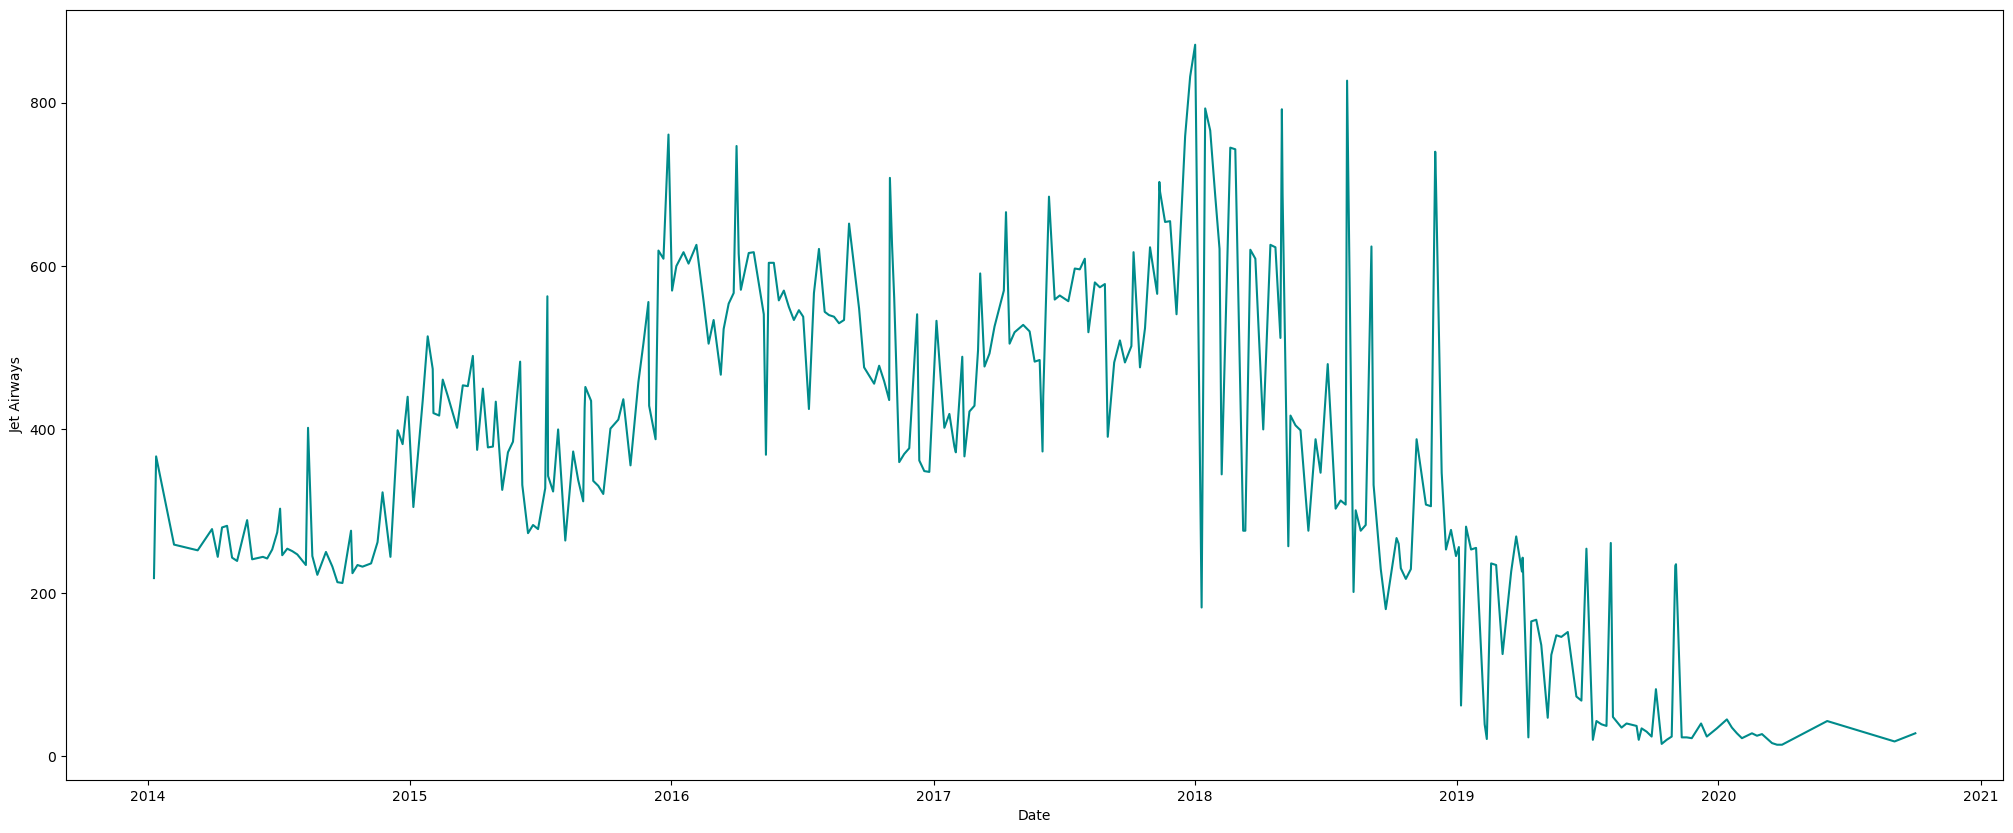

In [29]:
for i in mkt_data[num]:
    plt.figure(figsize=(25,10))
    sns.lineplot(data=mkt_data,x='Date',y=i,color='darkcyan')
    plt.show();

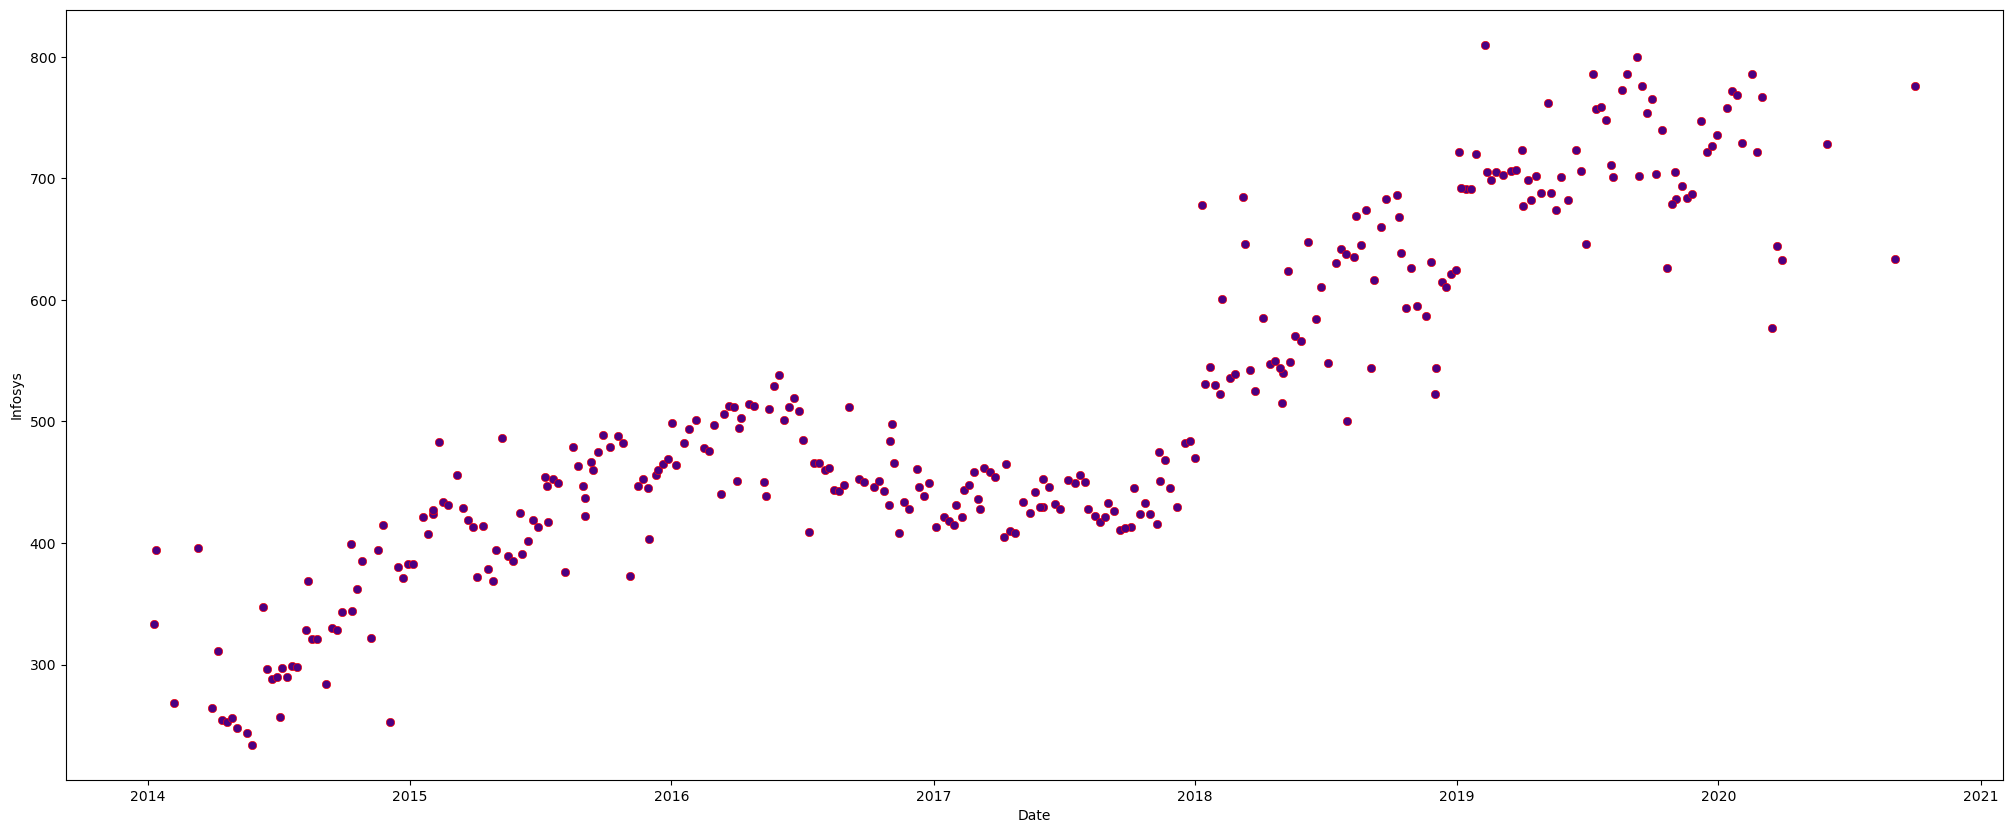

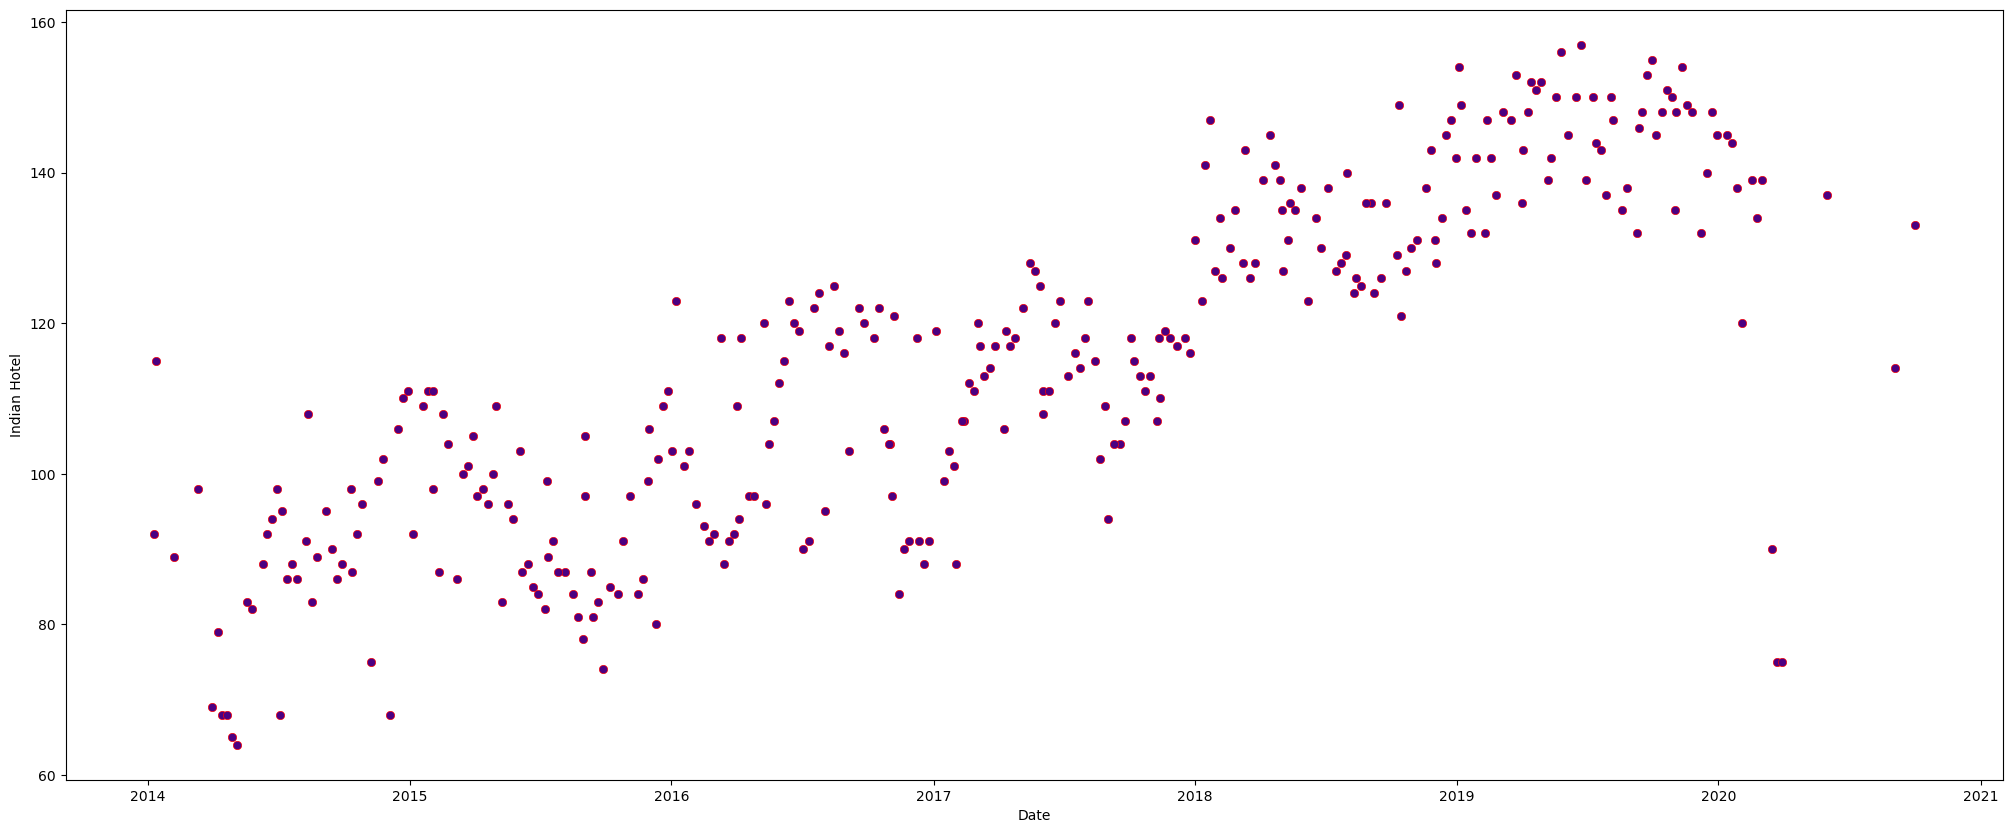

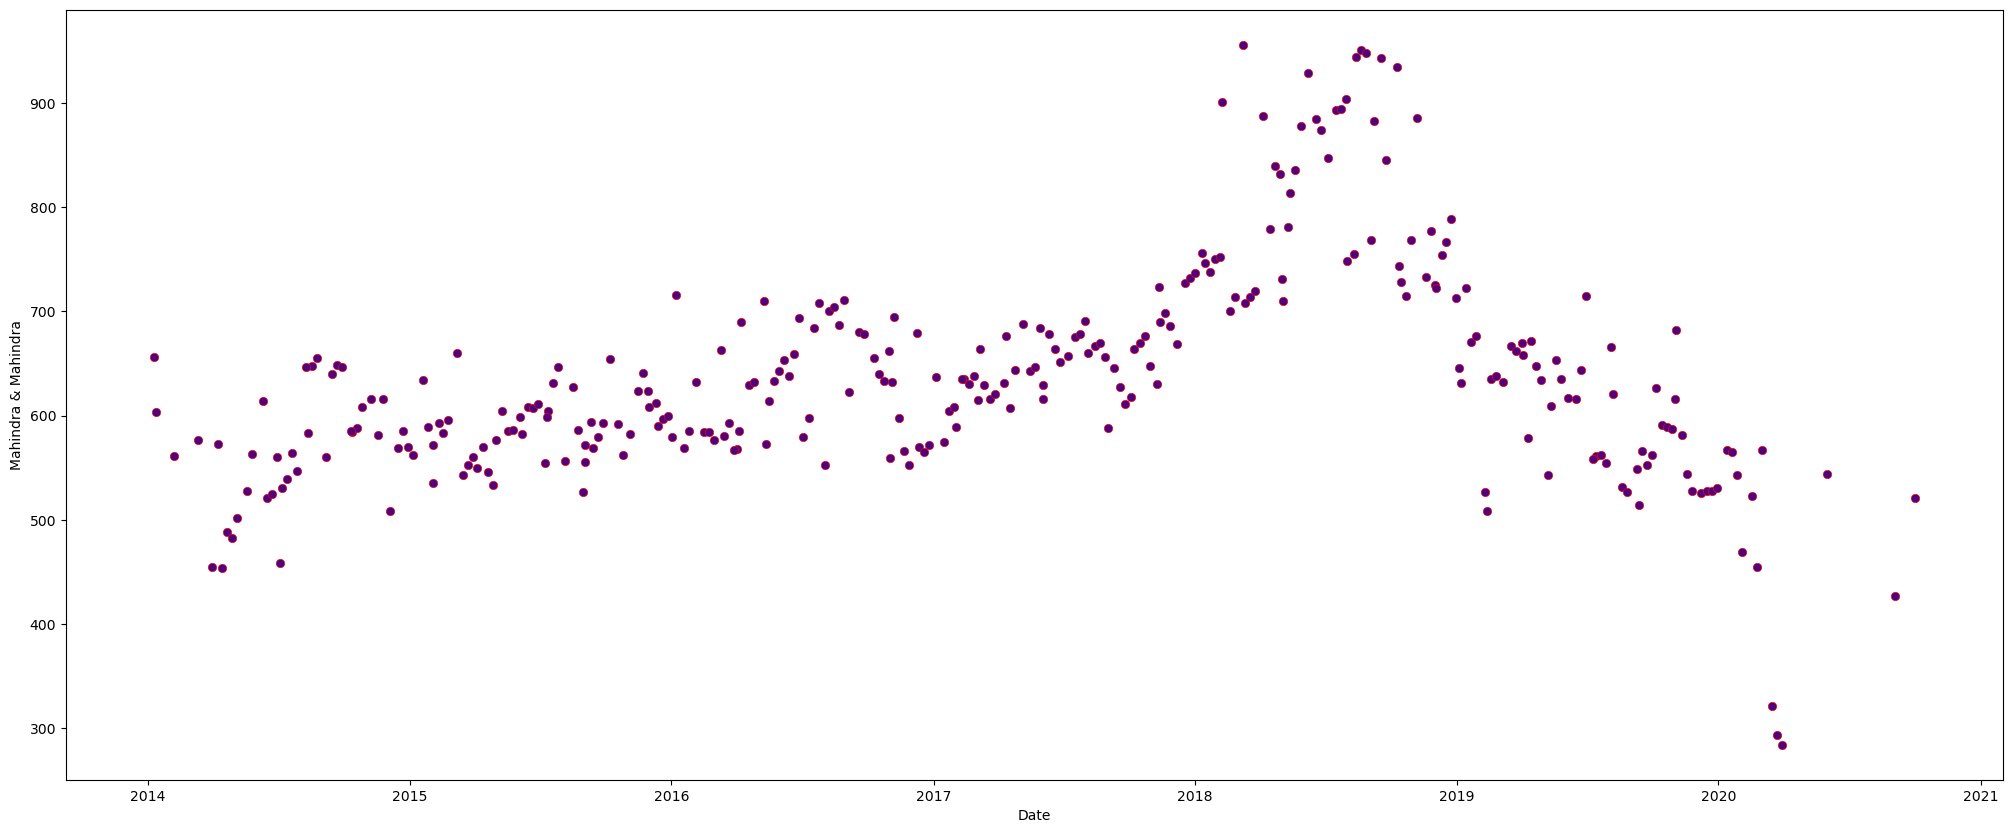

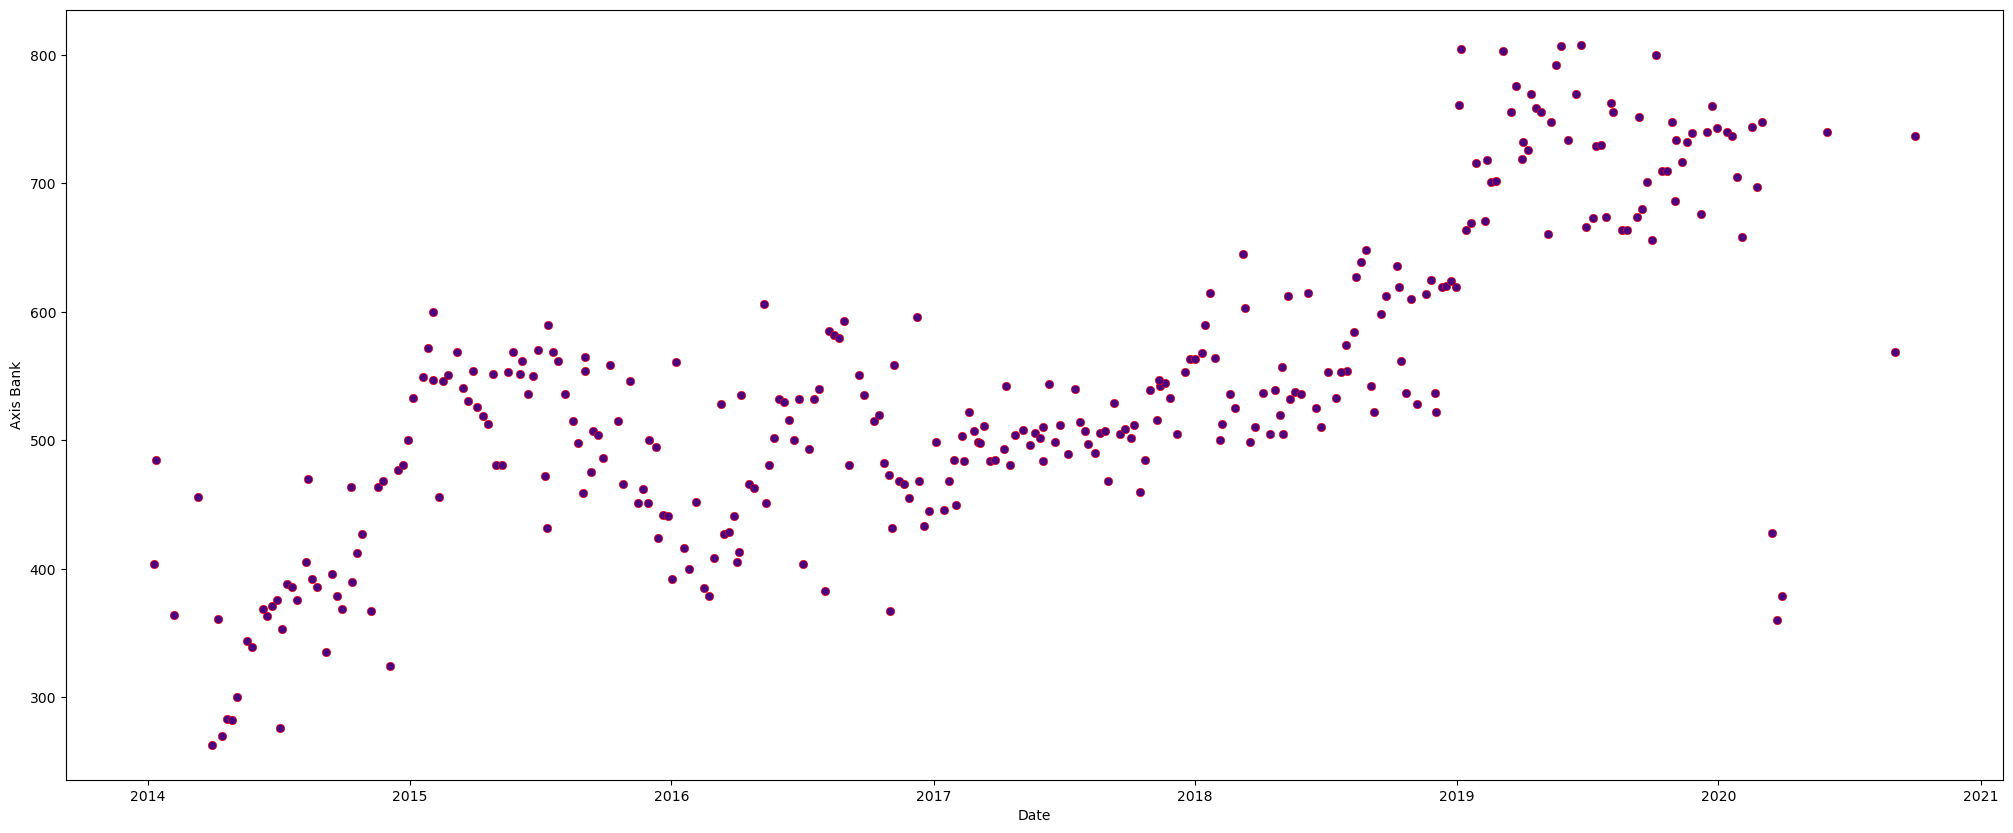

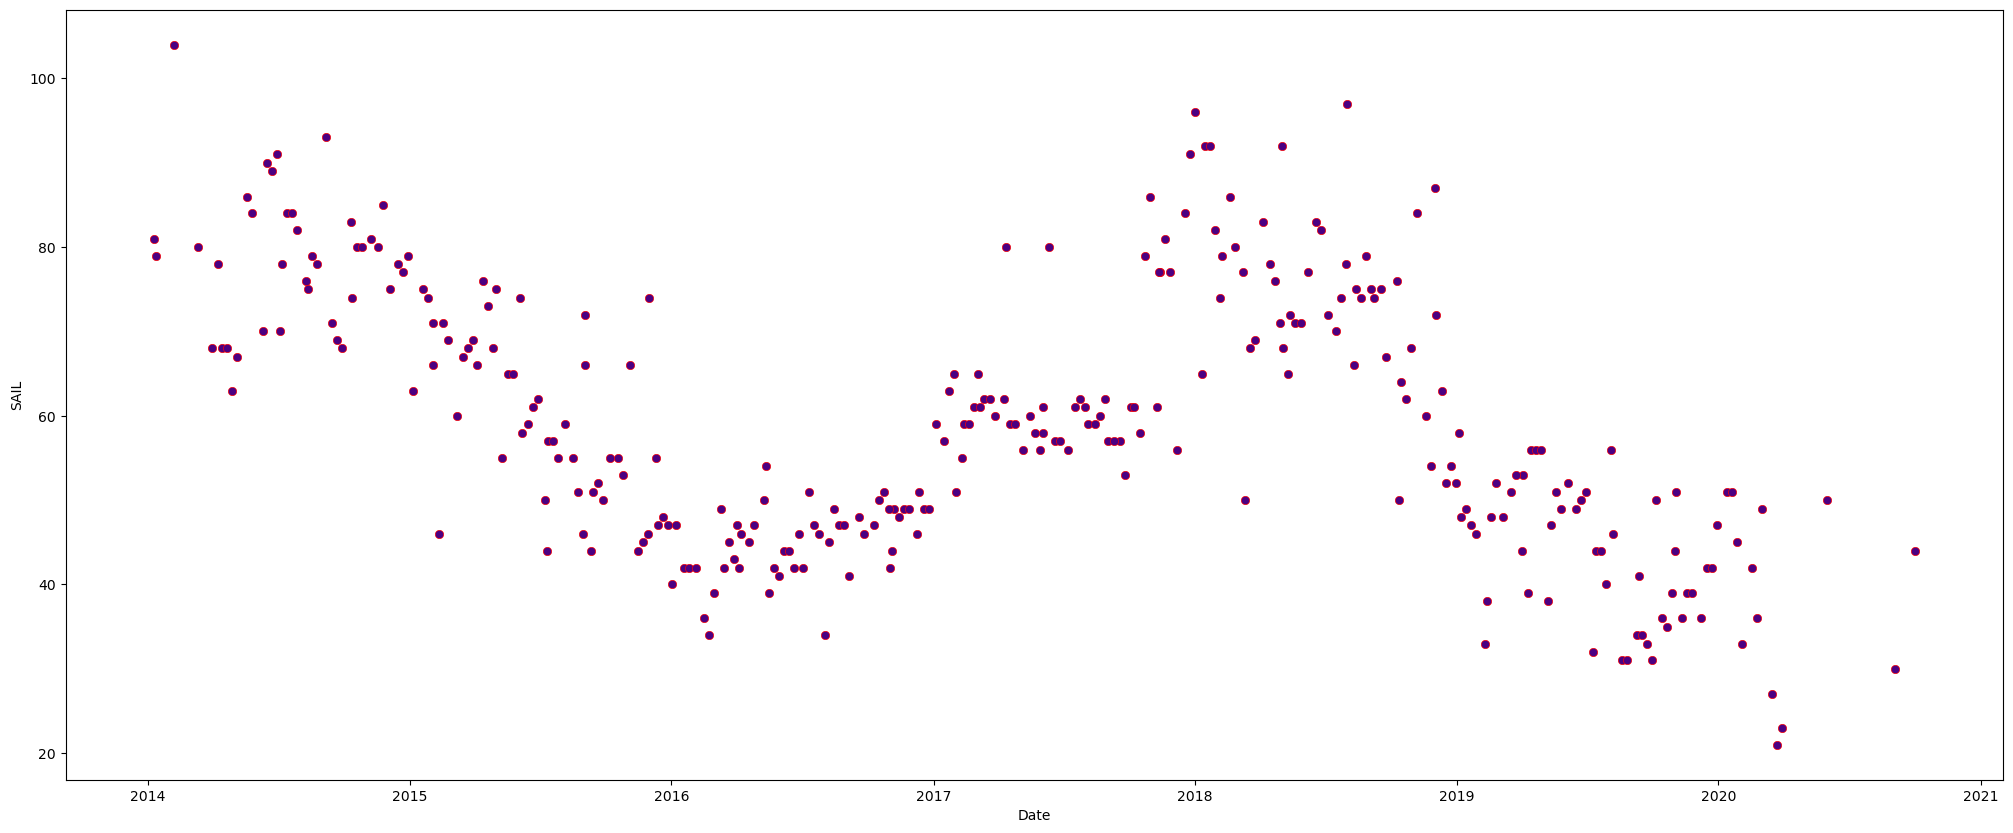

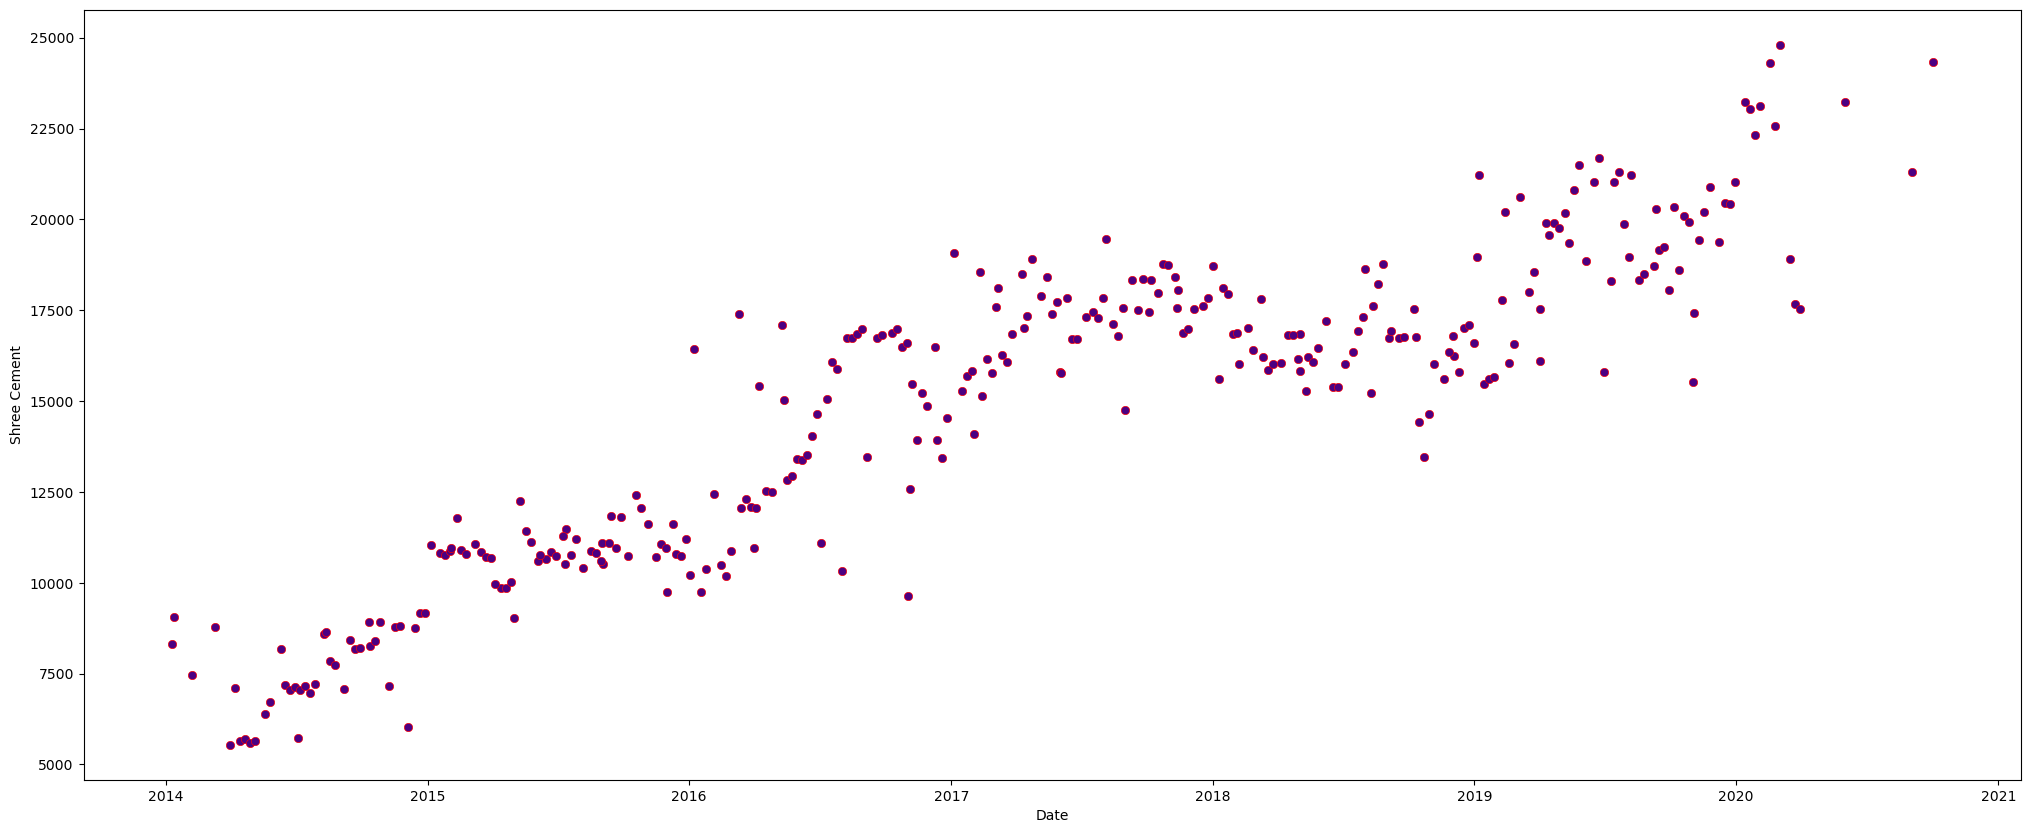

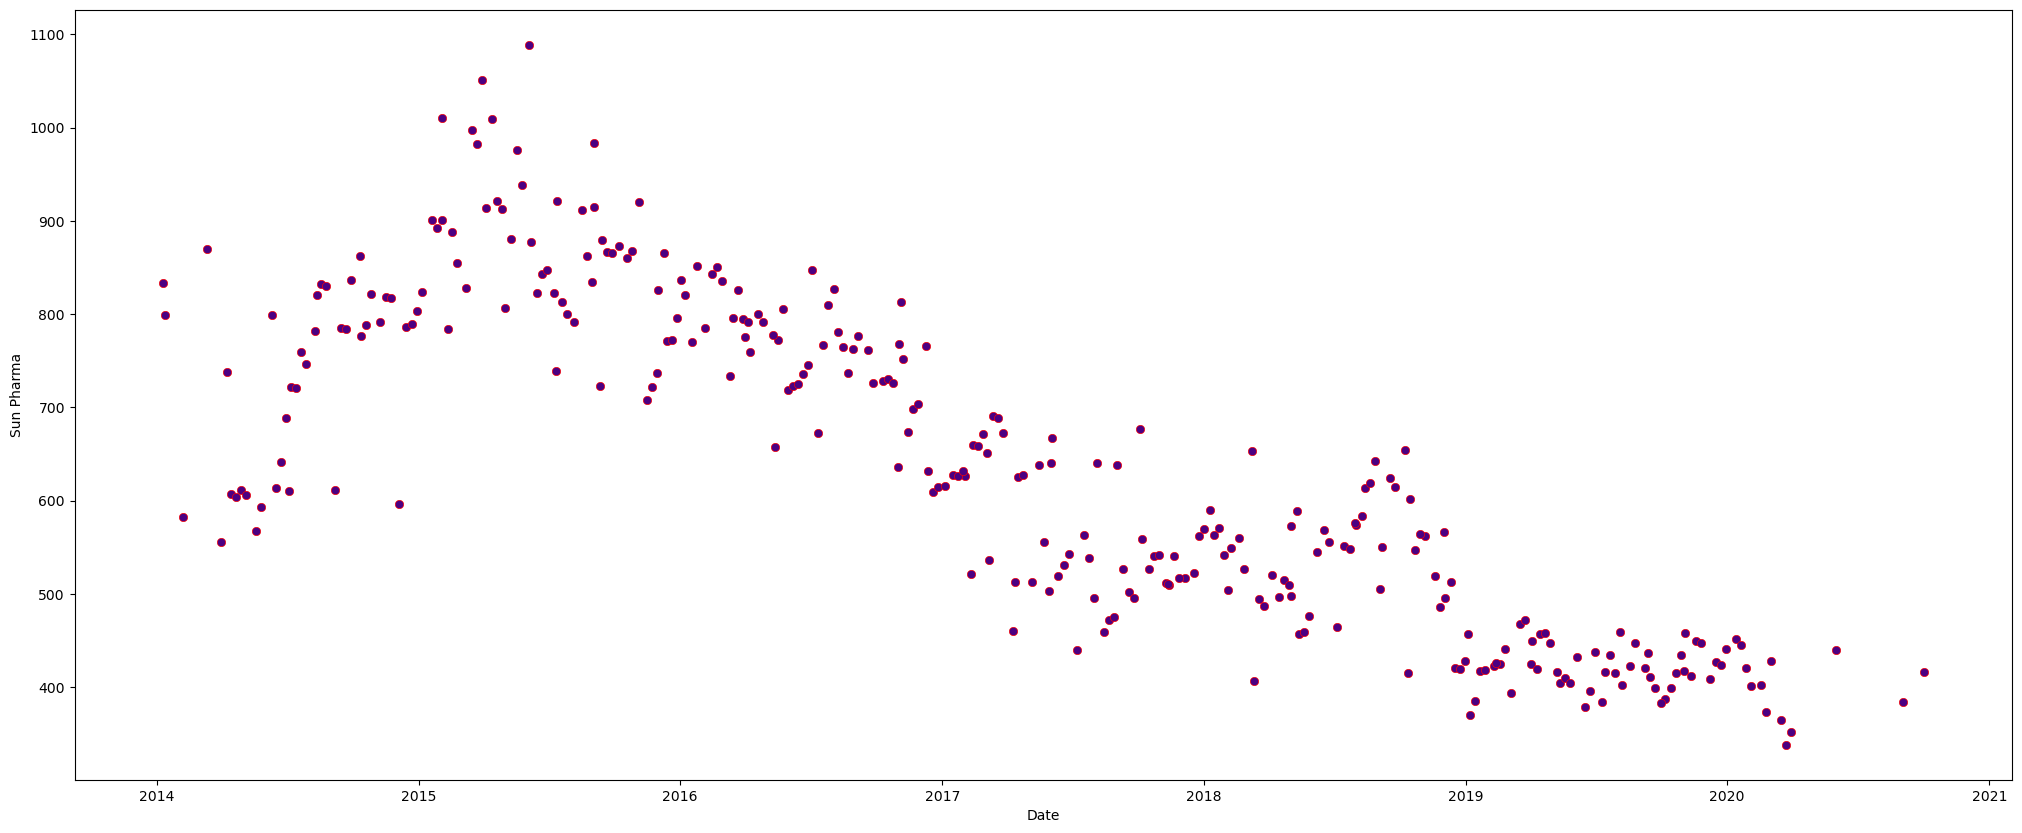

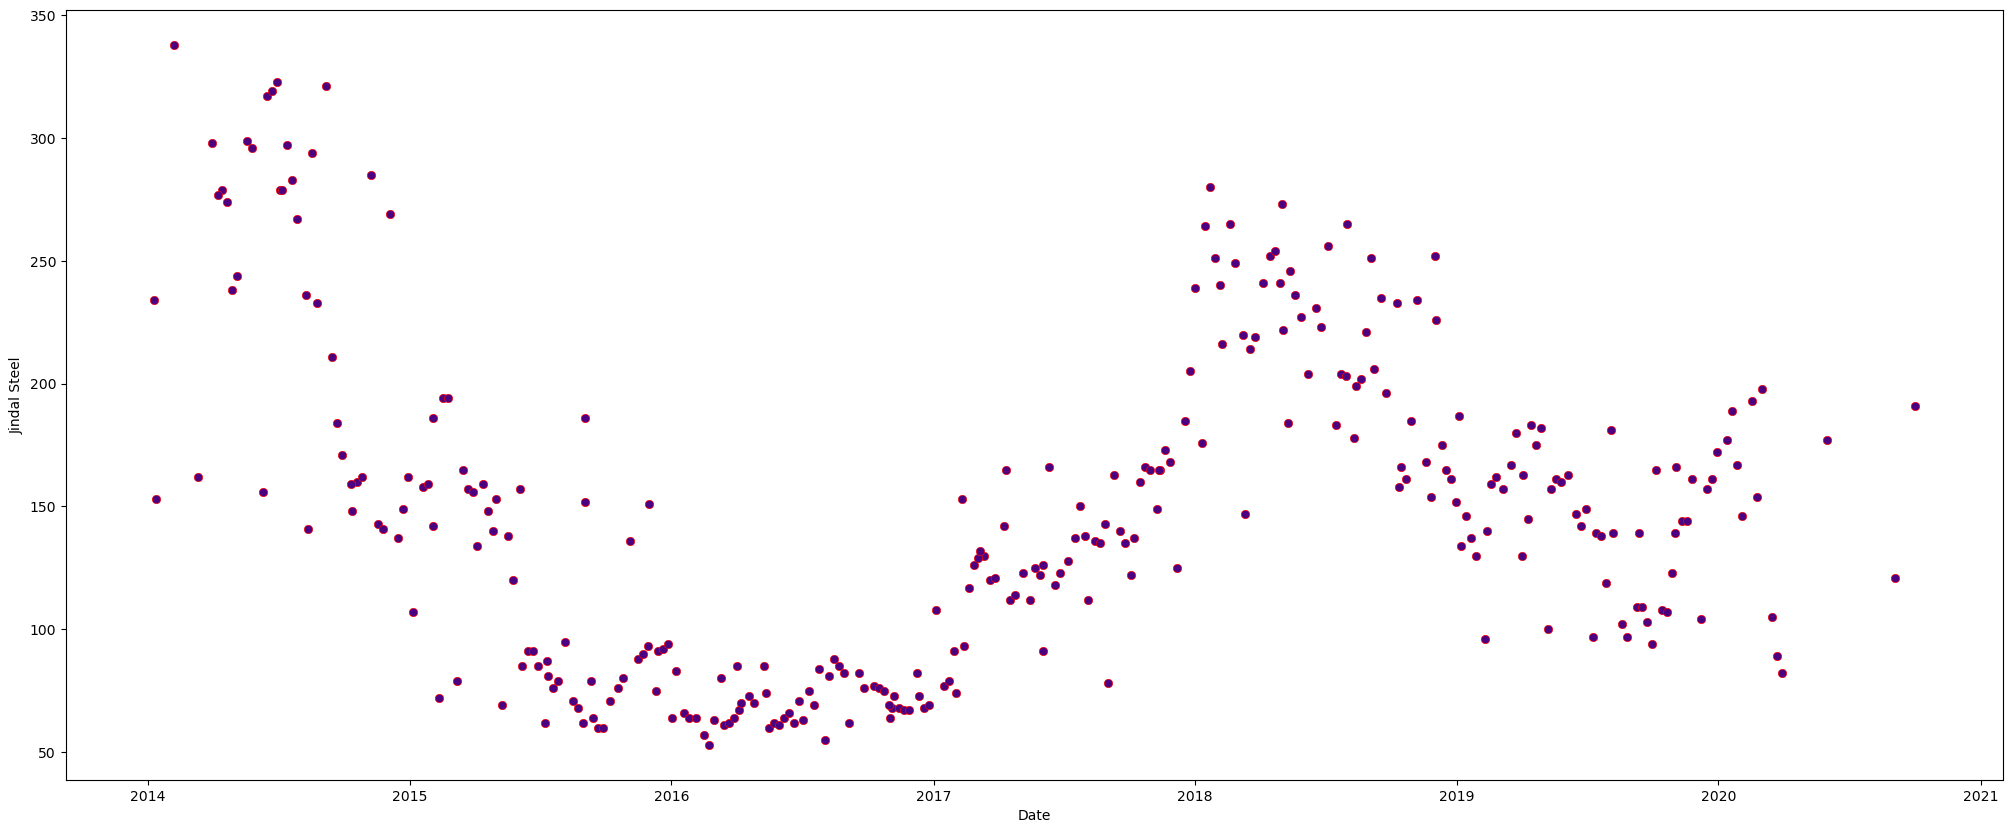

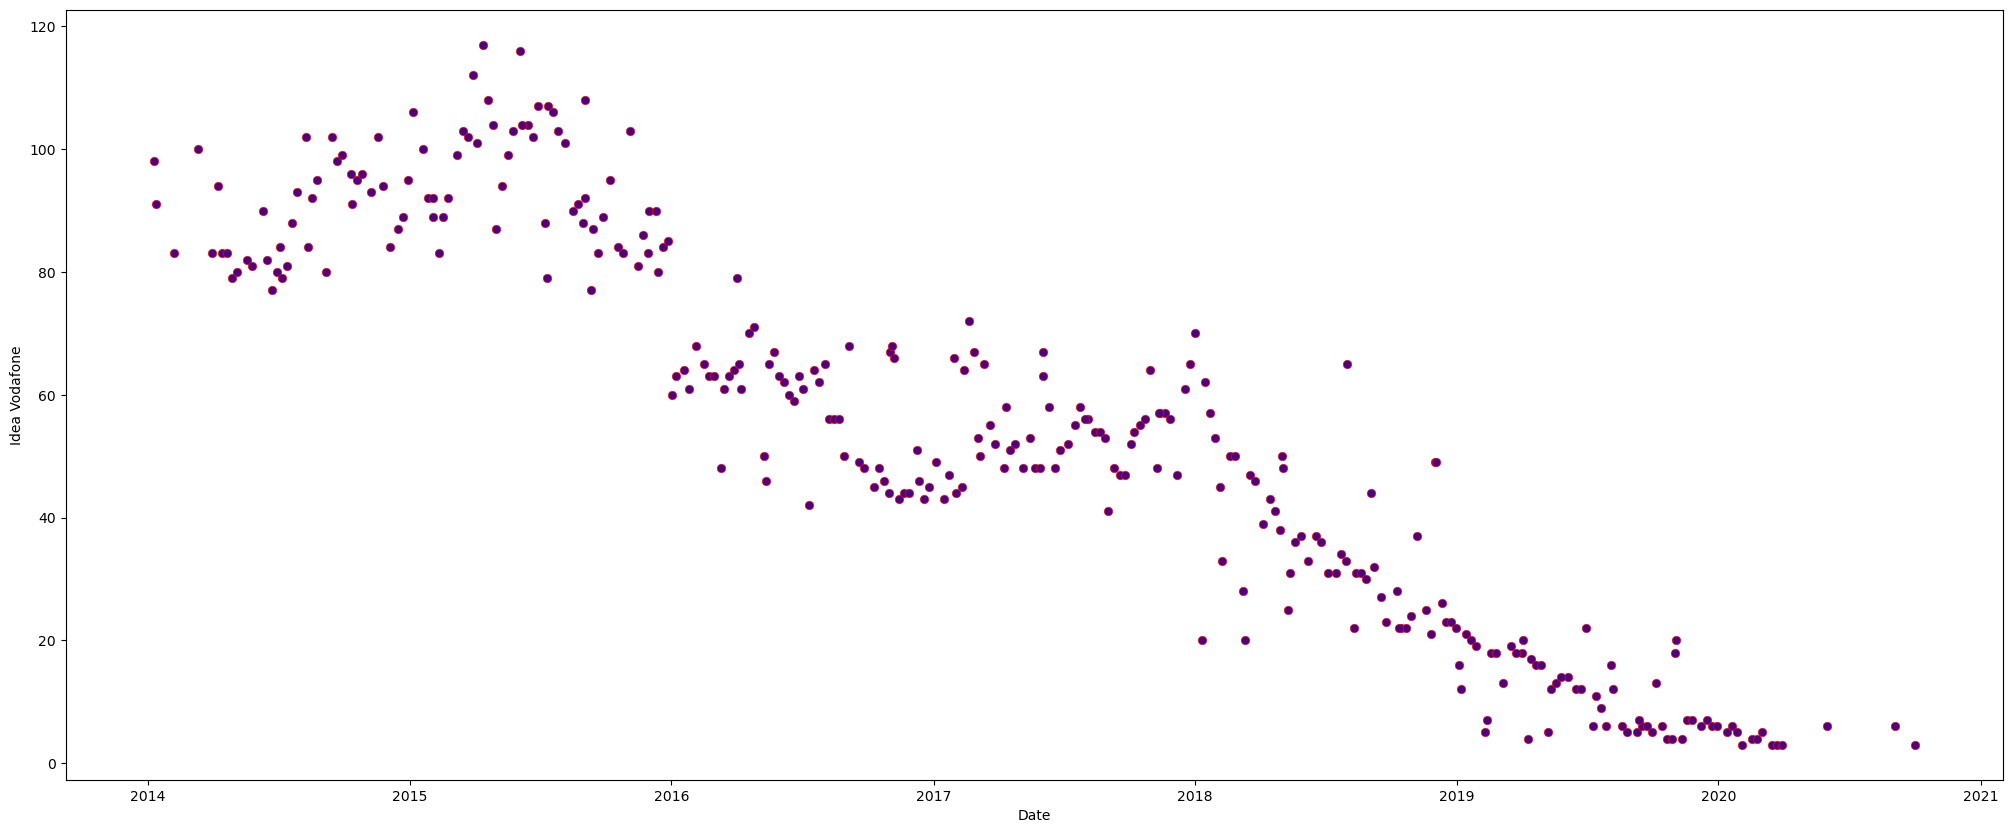

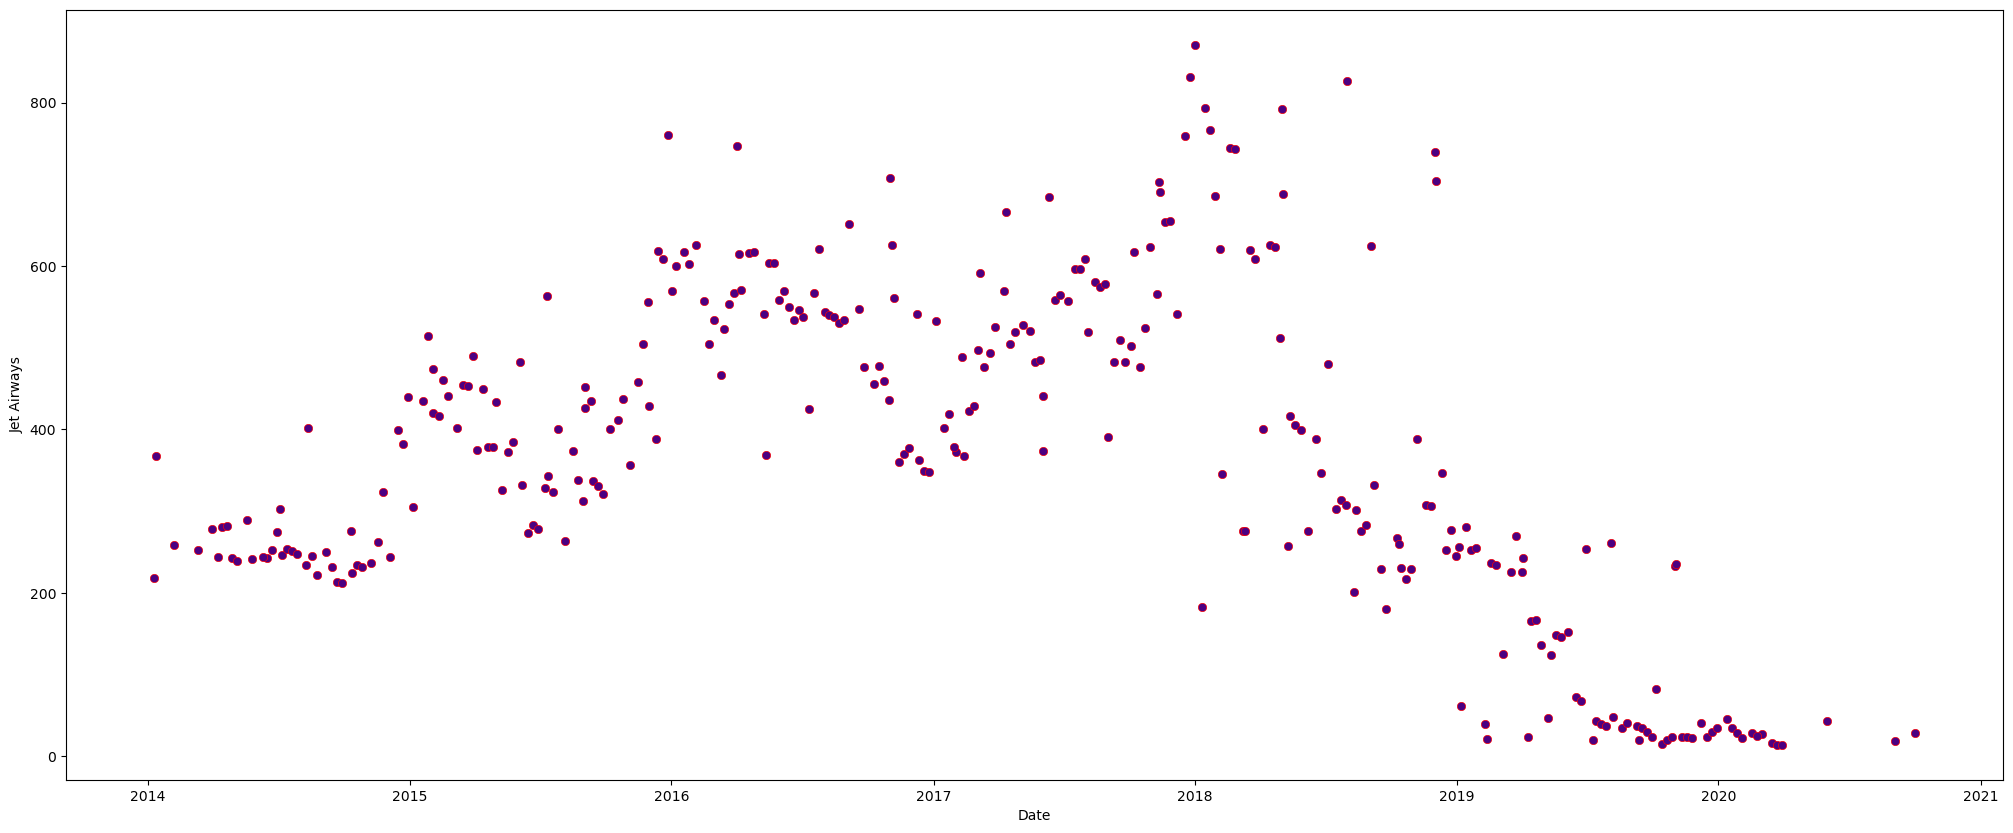

In [30]:
for i in mkt_data[num]:
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=mkt_data,x='Date',y=i,color='indigo',markers='o',edgecolor='r')
    plt.show();

Observations:
- Infosys, Indian Bank, Axis Bank and Shree Cement have a rising trend
- Mahindra & Mahindra , SAIL, Sun Pharma, Jindal Steel, Idea Vodafone  , Jet Airways all show a declining trend
- Just within the scope of this data and from this preliminary analysis, bank  and IT stocks seemed to have fared better 

## Computing Returns

In [38]:
mkt_returns=np.log(mkt_data.drop(['Date','Dates'],axis=1)).diff(axis=0,periods=1)

In [39]:
mkt_returns

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


In [41]:
mkt_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,313.0,0.002794,0.035070,-0.167300,-0.014514,0.004376,0.024553,0.135666
Indian Hotel,313.0,0.000266,0.047131,-0.236389,-0.023530,0.000000,0.027909,0.199333
Mahindra & Mahindra,313.0,-0.001506,0.040169,-0.285343,-0.020884,0.001526,0.019894,0.089407
Axis Bank,313.0,0.001167,0.045828,-0.284757,-0.022473,0.001614,0.028522,0.127461
SAIL,313.0,-0.003463,0.062188,-0.251314,-0.040822,0.000000,0.032790,0.309005
Shree Cement,313.0,0.003681,0.039917,-0.129215,-0.019546,0.003173,0.029873,0.152329
Sun Pharma,313.0,-0.001455,0.045033,-0.179855,-0.020699,0.001530,0.023257,0.166604
Jindal Steel,313.0,-0.004123,0.075108,-0.283768,-0.049700,0.000000,0.037179,0.243978
Idea Vodafone,313.0,-0.010608,0.104315,-0.693147,-0.045120,0.000000,0.024391,0.693147
Jet Airways,313.0,-0.009548,0.097972,-0.458575,-0.052644,-0.005780,0.036368,0.300249


Observations:
- Infosys, Indian Hotel, Axis Bank, Shree Cement all have positive mean returns
- The rest have negative mean returns.
- These are consistent with the observations from the plots

In [43]:
mean_returns= mkt_returns.mean(axis=0)
mean_returns

Infosys                0.002794
Indian Hotel           0.000266
Mahindra & Mahindra   -0.001506
Axis Bank              0.001167
SAIL                  -0.003463
Shree Cement           0.003681
Sun Pharma            -0.001455
Jindal Steel          -0.004123
Idea Vodafone         -0.010608
Jet Airways           -0.009548
dtype: float64

In [44]:
std_returns=mkt_returns.std(axis=0)
std_returns

Infosys                0.035070
Indian Hotel           0.047131
Mahindra & Mahindra    0.040169
Axis Bank              0.045828
SAIL                   0.062188
Shree Cement           0.039917
Sun Pharma             0.045033
Jindal Steel           0.075108
Idea Vodafone          0.104315
Jet Airways            0.097972
dtype: float64

In [46]:
mkt_consolidated=pd.DataFrame({'Returns':mean_returns,'Volatility':std_returns},index=mkt_returns.columns)

In [47]:
mkt_consolidated

,Returns,Volatility
Infosys,0.002794,0.035070
Indian Hotel,0.000266,0.047131
Mahindra & Mahindra,-0.001506,0.040169
Axis Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree Cement,0.003681,0.039917
Sun Pharma,-0.001455,0.045033
Jindal Steel,-0.004123,0.075108
Idea Vodafone,-0.010608,0.104315
Jet Airways,-0.009548,0.097972


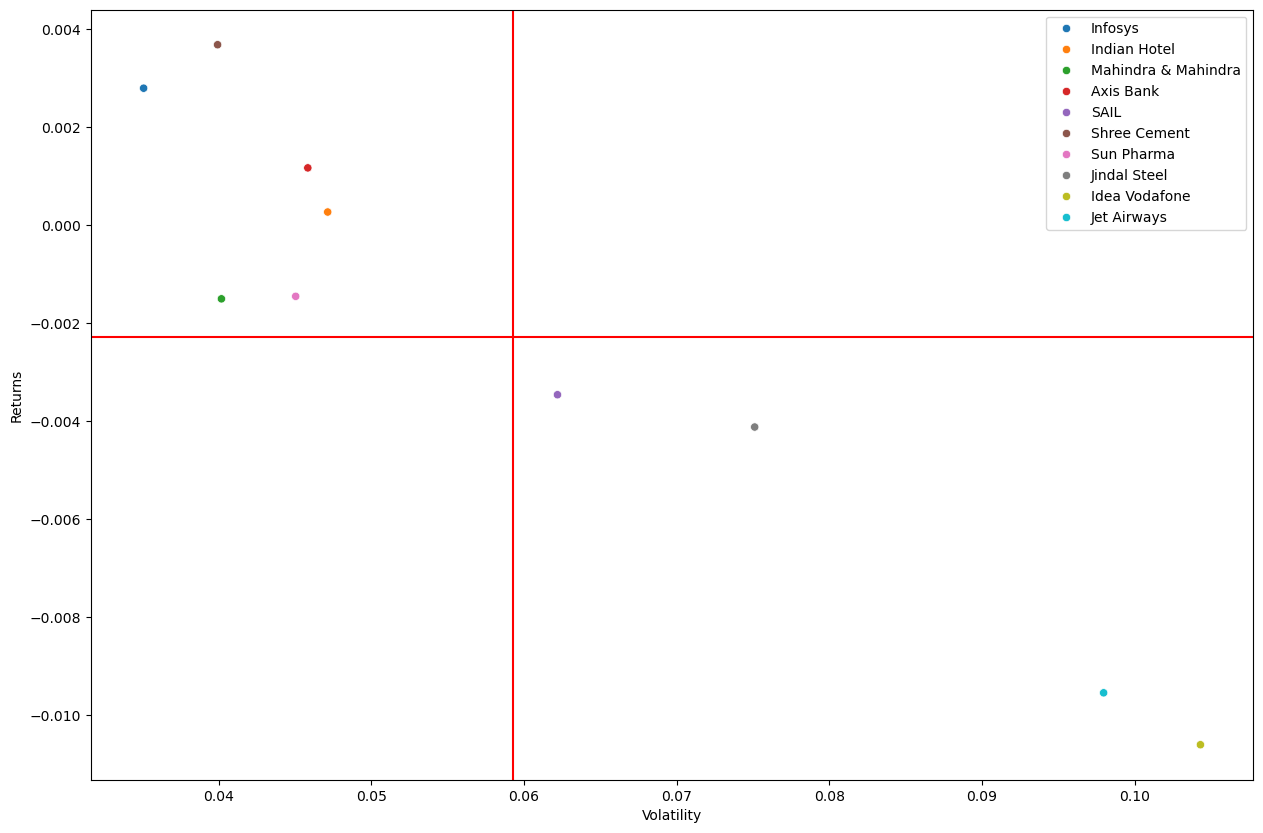

In [56]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=mkt_consolidated,x='Volatility',y='Returns',hue=mkt_consolidated.index)
plt.legend(loc='best')
plt.axhline(y=mkt_consolidated['Returns'].mean(),color='r')
plt.axvline(x=mkt_consolidated['Volatility'].mean(),color='r')

Observations:
- Infosys and Shree Cement are the best stocks, with high returns and low volatility
- Idea Vodafone and Jet Airways are the worst performing stocks, with low returns and high volatility
- Shree Cement has the highest returns and Idea Vodafone has the lowest returns
- Infosys has the lowest volatility and Idea Vodafone has the highest volatility